# 呱吉只是個會脫褲子的小丑還是有政治理念的議員？

### 檢視呱吉當初投入政治到底做到了些什麼

### 1. 體制有問題，就該從頭改變，不是選上了才想要怎麼改變


「花一千萬元就跟其他候選人沒兩樣，我不做海報、旗幟，不想打不環保的選戰。」

# 期末

### 2. 到底怎麼當選的？ 票都來自粉絲嗎？
### 3. 7大競選政見有做到嗎？ 網路輿情分析，看看呱吉被大家討論的事件都是什麼

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import cm
import re

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,項目名稱,選舉名稱,申報序號／年度,交易日期,收支科目,捐贈者／支出對象,身分證／統一編號,收入金額,支出金額,支出用途,金錢類,地址,聯絡電話,資料更正日期
0,邱威傑,107年臺北市議員選舉,首次,107 年 09 月 03 日,匿名捐贈,匿名,NaN,147,0,NaN,金錢,NaN,NaN,NaN
1,邱威傑,107年臺北市議員選舉,首次,107 年 09 月 06 日,交通旅運支出,邱威傑,A12*******,0,255,搭乘交通工具支出,金錢,臺北市信義區****,NaN,NaN
2,邱威傑,107年臺北市議員選舉,首次,107 年 09 月 10 日,雜支支出,02-27615220,42429764,0,685,餐飲費用,金錢,臺北市南京東****,NaN,NaN
3,邱威傑,107年臺北市議員選舉,首次,107 年 09 月 19 日,宣傳支出,翔茂商行,72646774,0,4266,競選團隊背心,金錢,新竹市香山區****,NaN,NaN
4,邱威傑,107年臺北市議員選舉,首次,107 年 09 月 25 日,交通旅運支出,邱威傑,A12*******,0,180,搭乘交通工具支出,金錢,臺北市信義區****,NaN,NaN


In [4]:
df['年月']  = df['交易日期'].apply(lambda x: int(x.split(' ')[0]+x.split(' ')[2]))

In [5]:
df_year = df[['年月','收入金額']]

## 呱吉的收入

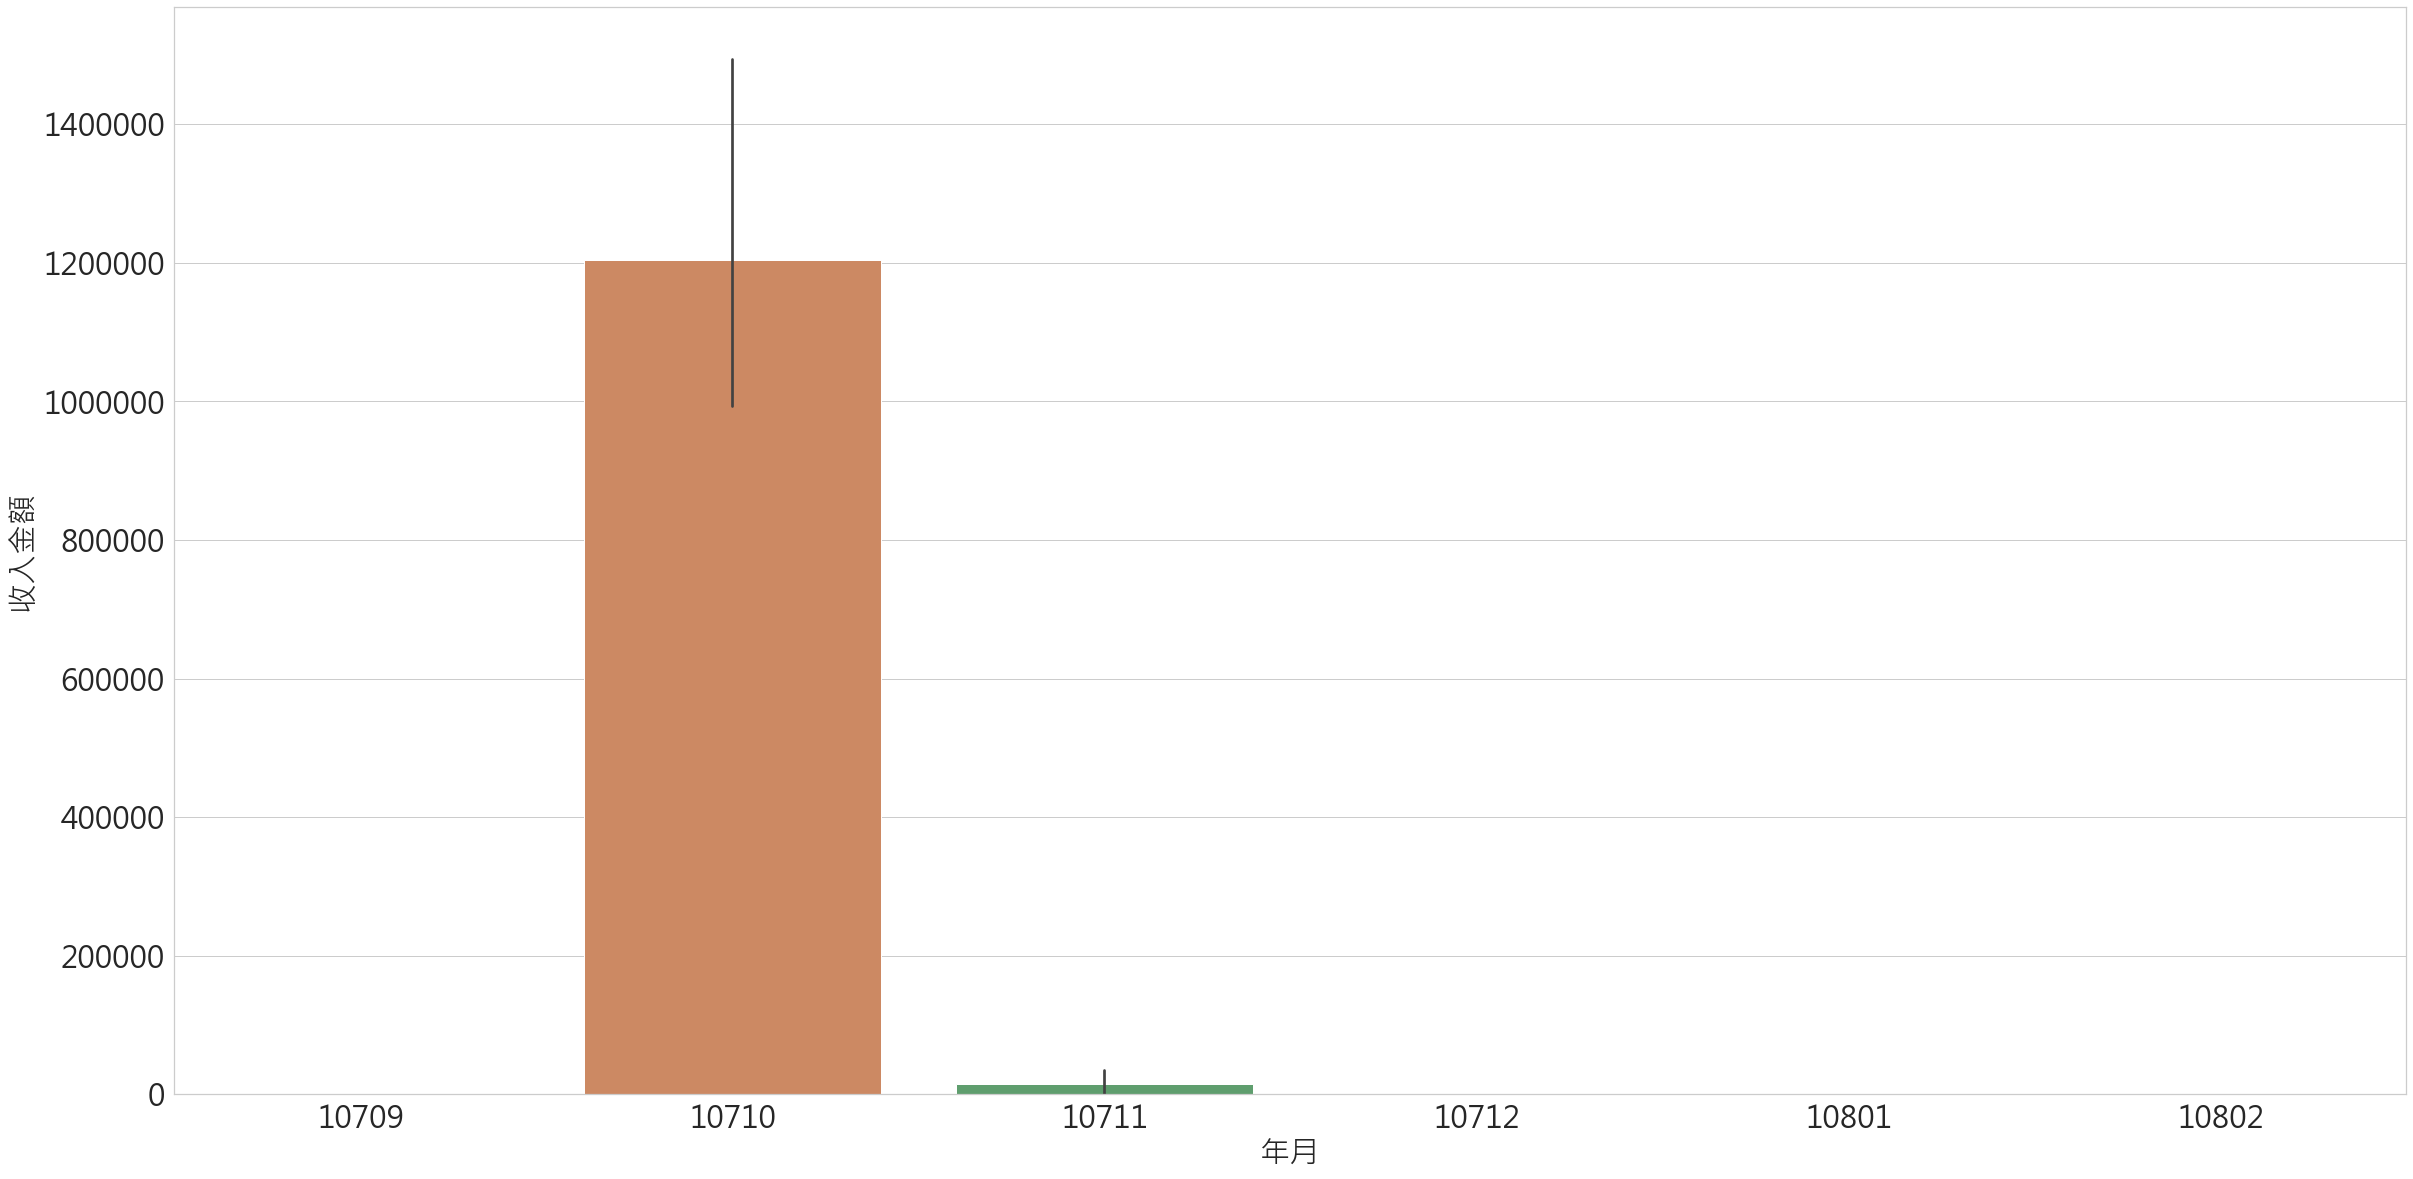

In [6]:
plt.figure(figsize=(40, 20))
plt.ylabel('收入金額',fontsize=30)
plt.xlabel('年月',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax = sns.barplot(x="年月", y="收入金額", data=df_year, estimator=sum)

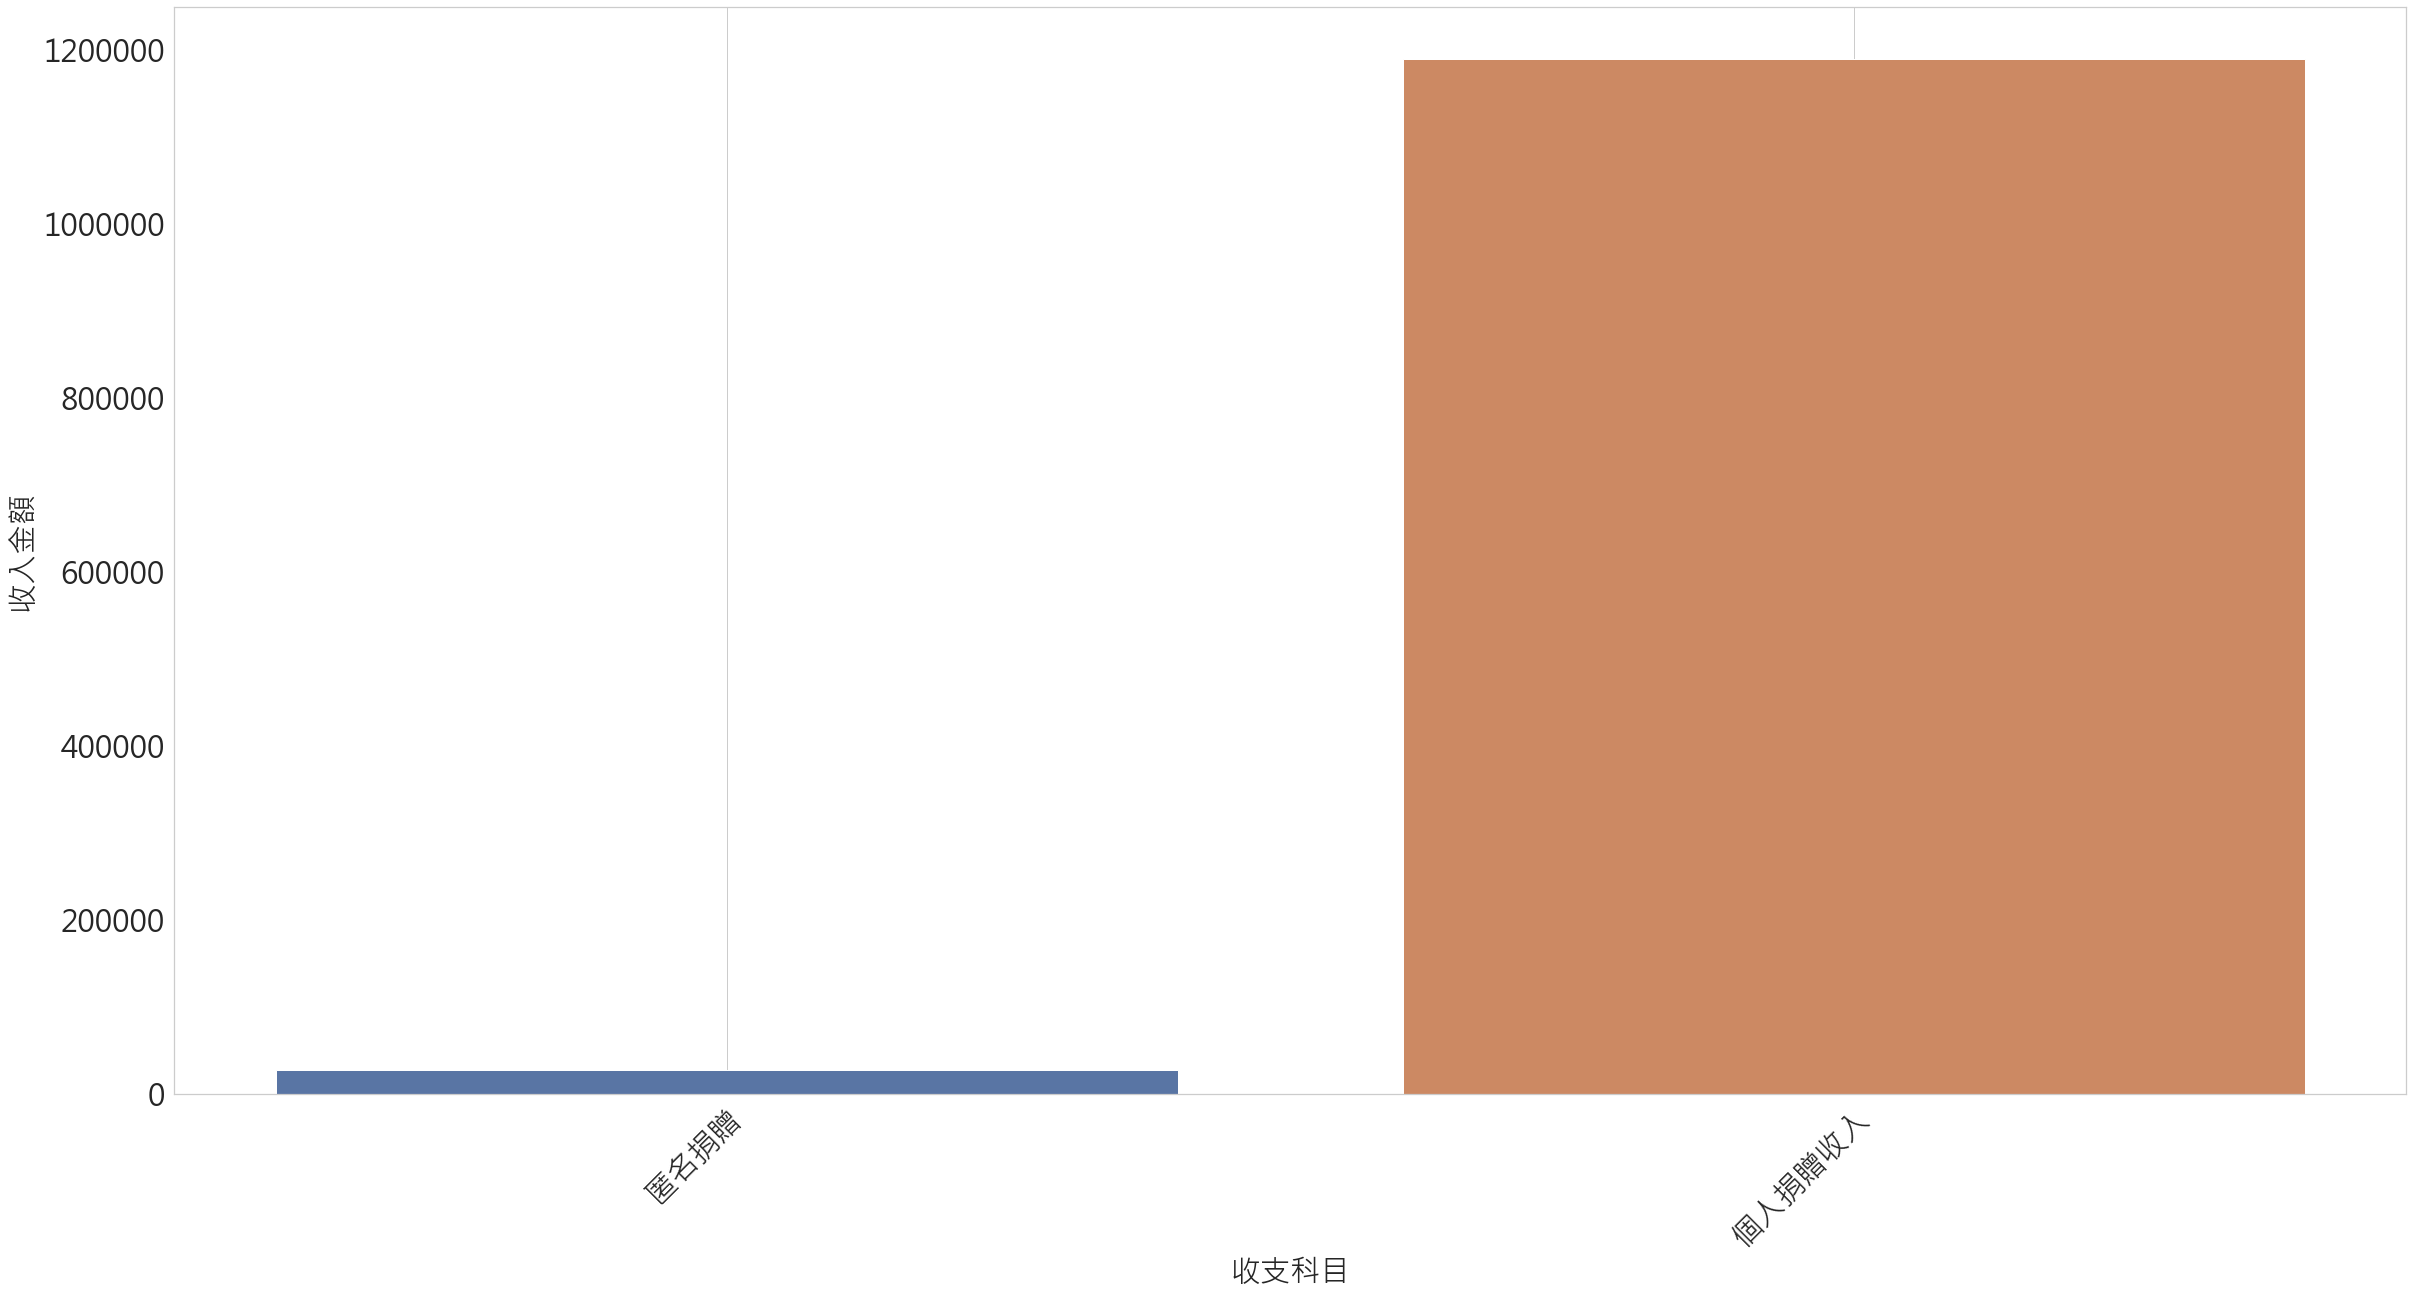

In [7]:
expense = df[df['收入金額']!=0].groupby(by='收支科目').sum()
expense = expense.reset_index()
expense = expense.sort_values(by='收入金額')
expense = expense[expense['收入金額']>=1000]

plt.figure(figsize=(40, 20))
ax = sns.barplot(x="收支科目", y="收入金額", data=expense[['收支科目','收入金額']], estimator=sum)
label = ax.get_xticklabels()
plt.setp(label, rotation=45, ha="right",rotation_mode="anchor")
plt.ylabel('收入金額',fontsize=30)
plt.xlabel('收支科目',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
_ = plt.plot()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


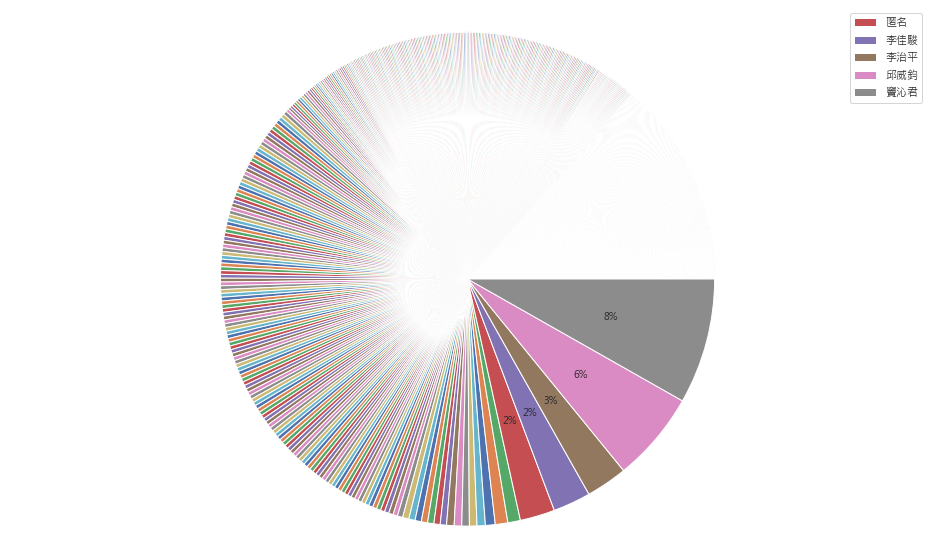

In [8]:
income = df[df['收入金額']!=0].groupby(by='捐贈者／支出對象').sum().sort_values(by='收入金額')
sizes = income[['收入金額']]

fig1, ax = plt.subplots()

def autopct_more_than_1(pct):
    return ('%1.f%%' % pct) if pct > 1 else ''


p,t,a = ax.pie(sizes.values, autopct=autopct_more_than_1)
ax.axis('equal') 

normsizes = sizes/sizes.sum()*100
h,l = zip(*[(h,lab) for h,lab,i in zip(p,sizes.index.values,normsizes.values) if i > 1])
ax.legend(h, l,loc="best", bbox_to_anchor=(1,1))

fig = plt.gcf()
fig.set_size_inches(16.5, 10)

plt.show()

## 呱吉的支出

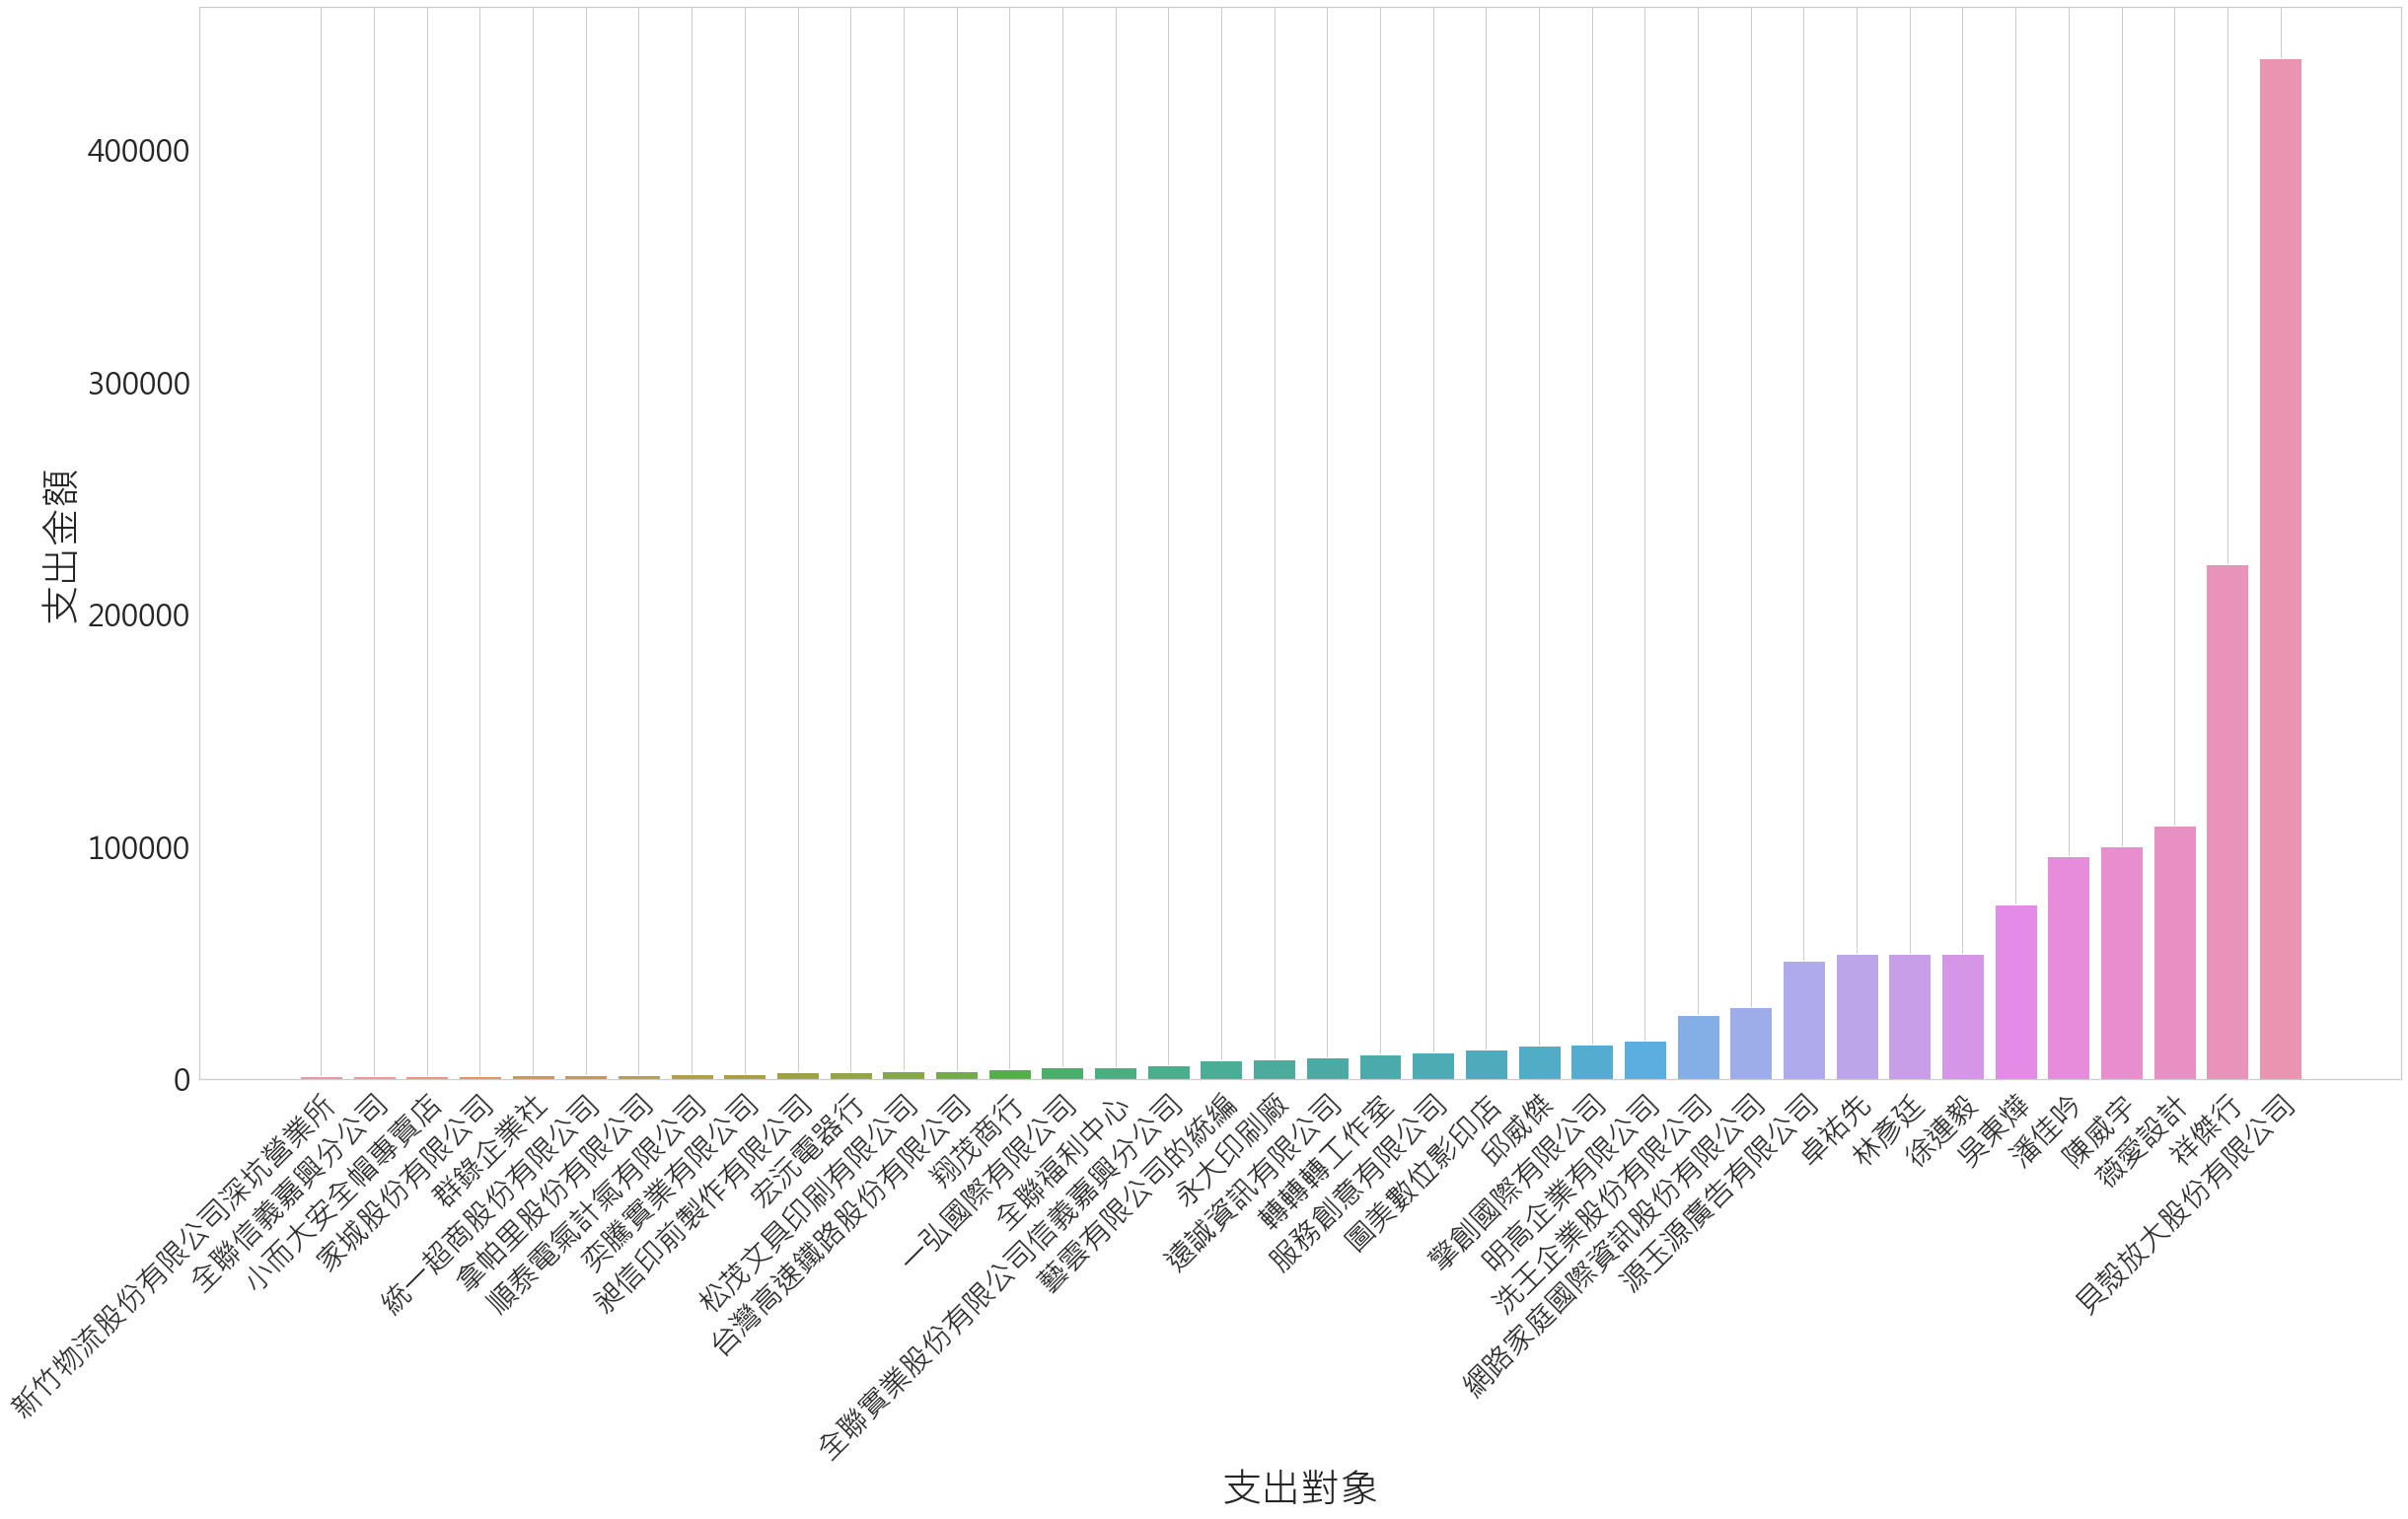

In [9]:
expense = df[df['支出金額']!=0].groupby(by='捐贈者／支出對象').sum()
expense = expense.reset_index()
expense = expense.sort_values(by='支出金額')
expense = expense[expense['支出金額']>=1000]

plt.figure(figsize=(40, 20))
ax = sns.barplot(x="捐贈者／支出對象", y="支出金額", data=expense[['捐贈者／支出對象','支出金額']], estimator=sum)
label = ax.get_xticklabels()
plt.setp(label, rotation=45, ha="right",rotation_mode="anchor")
plt.ylabel('支出金額',fontsize=40)
plt.xlabel('支出對象',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
_ = plt.plot()

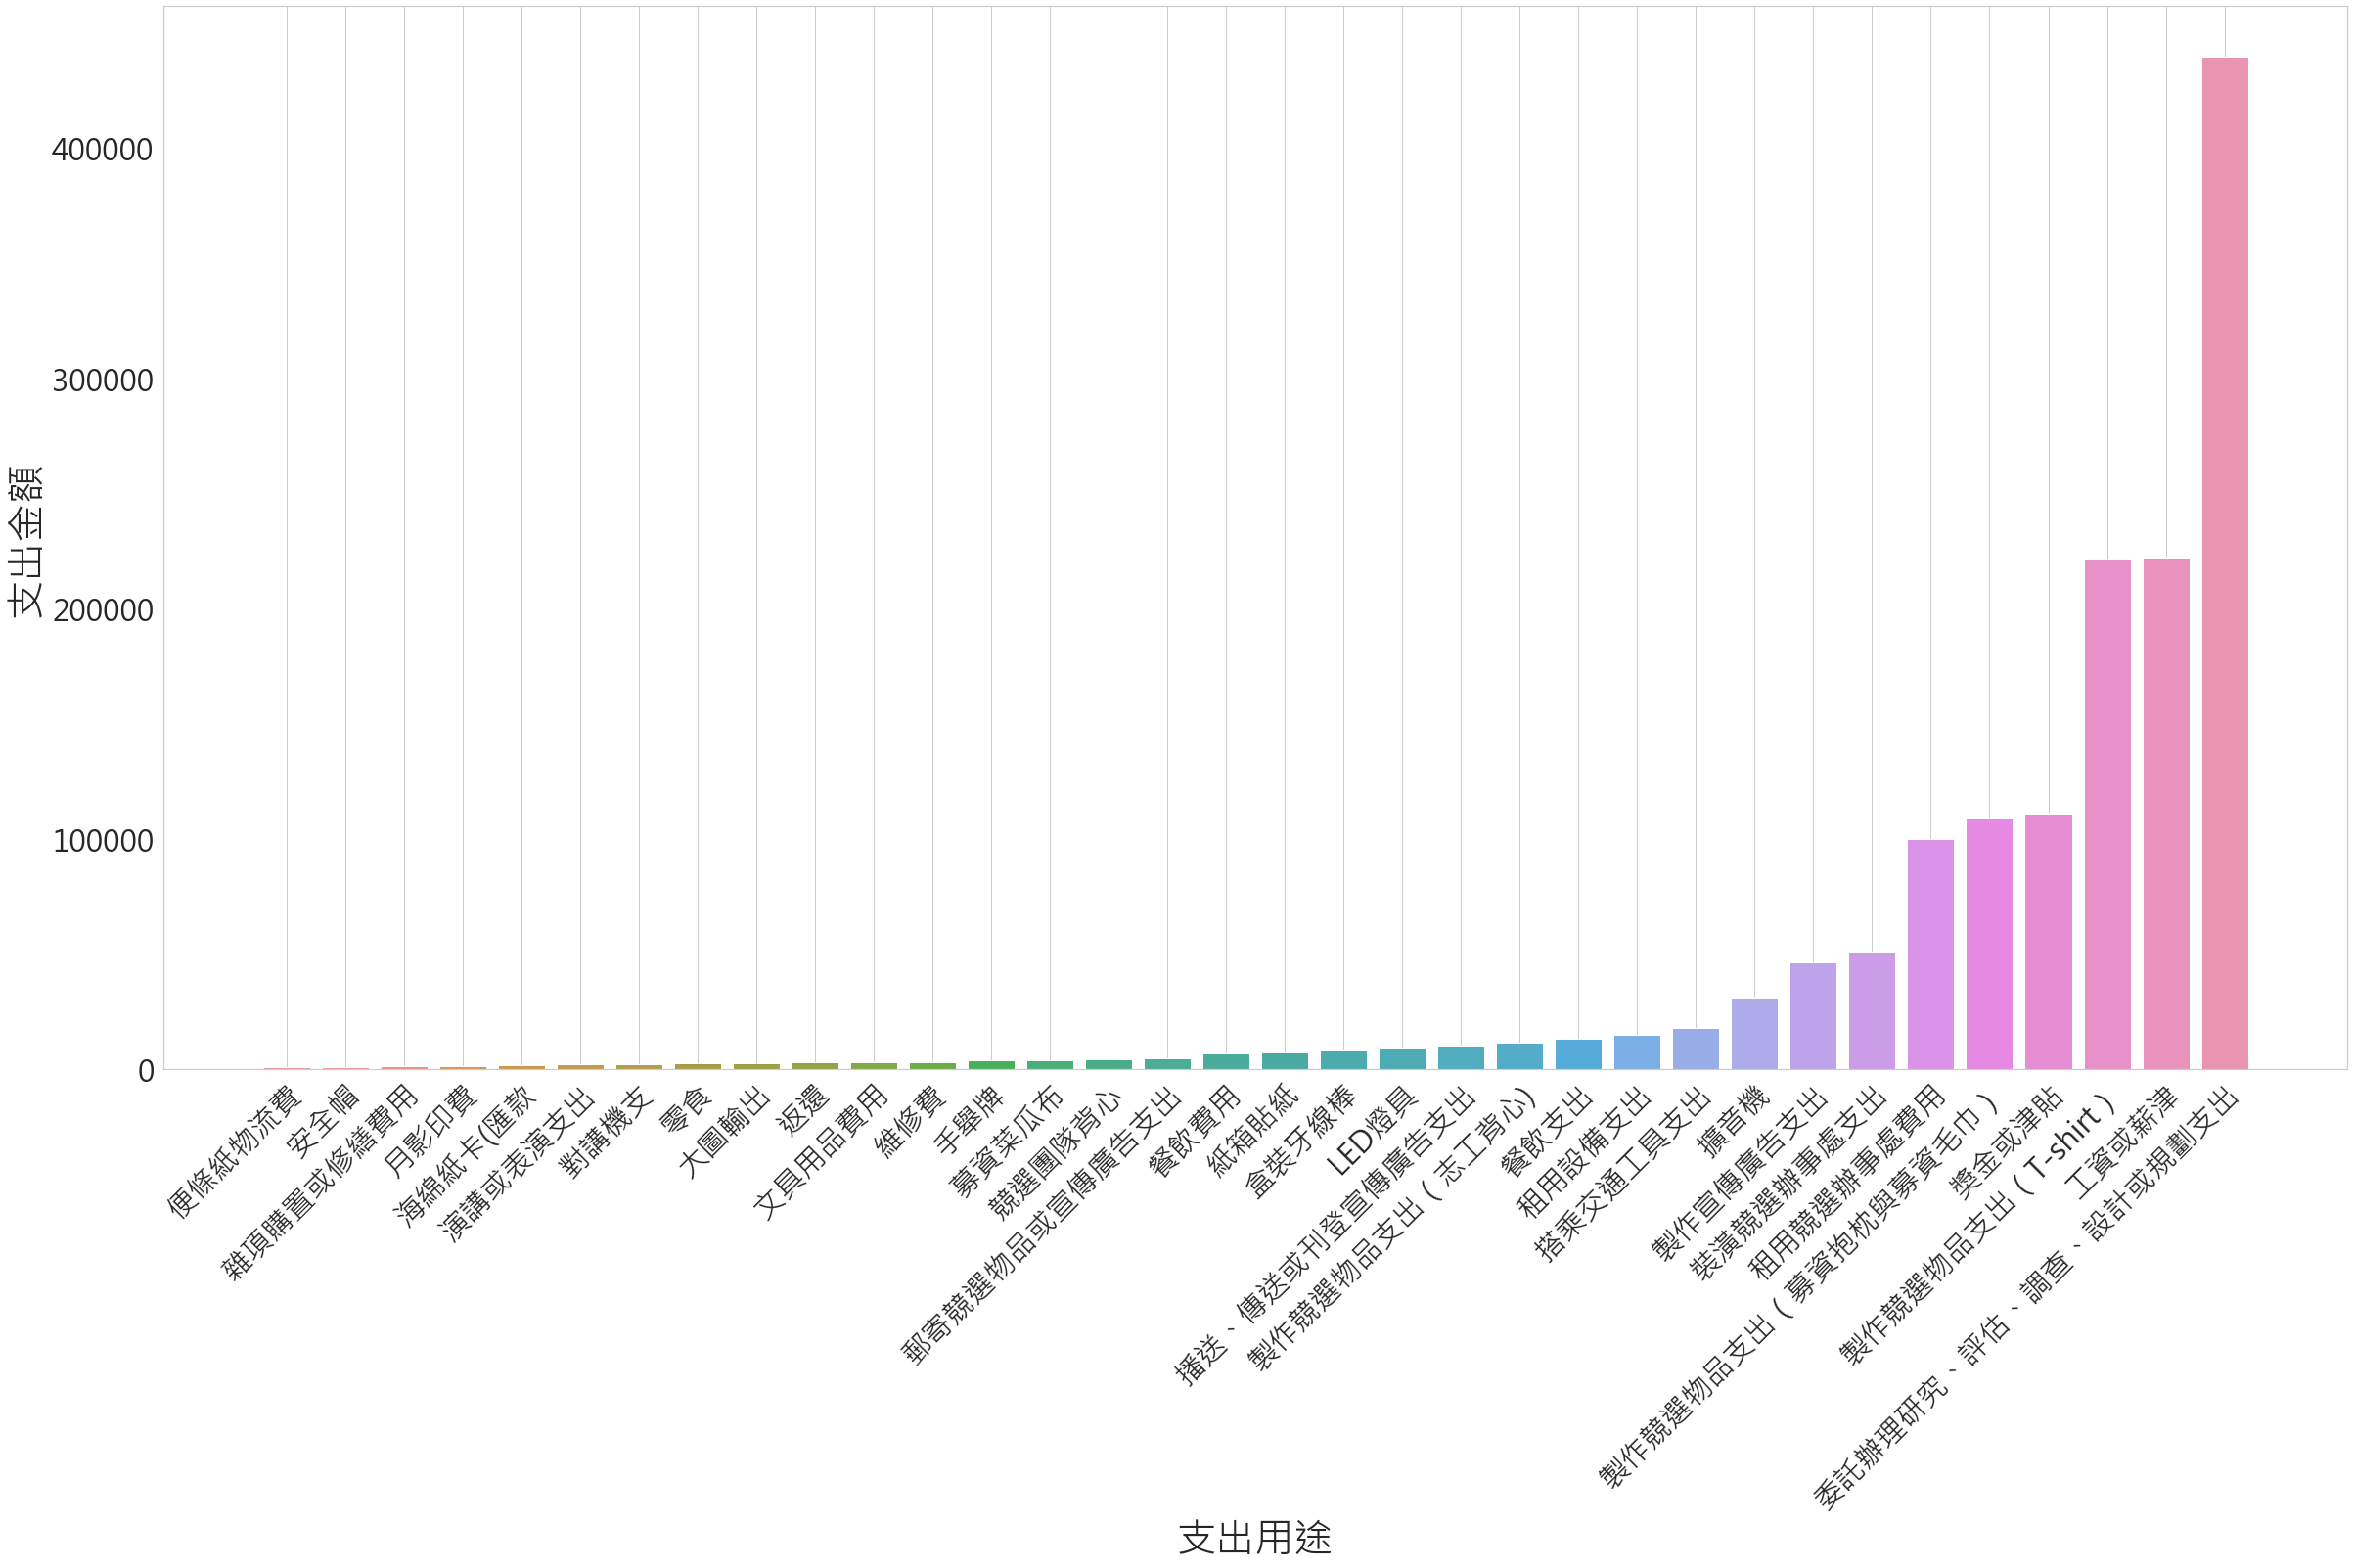

In [10]:
expense = df[df['支出金額']!=0].groupby(by='支出用途').sum().reset_index().sort_values(by='支出金額')
expense = expense[expense['支出金額']>=1000]

plt.figure(figsize=(40, 20))
ax = sns.barplot(x="支出用途", y="支出金額", data=expense[['支出用途','支出金額']], estimator=sum)
label = ax.get_xticklabels()
plt.setp(label, rotation=45, ha="right",rotation_mode="anchor")
plt.ylabel('支出金額',fontsize=40)
plt.xlabel('支出用途',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
_ = plt.plot()

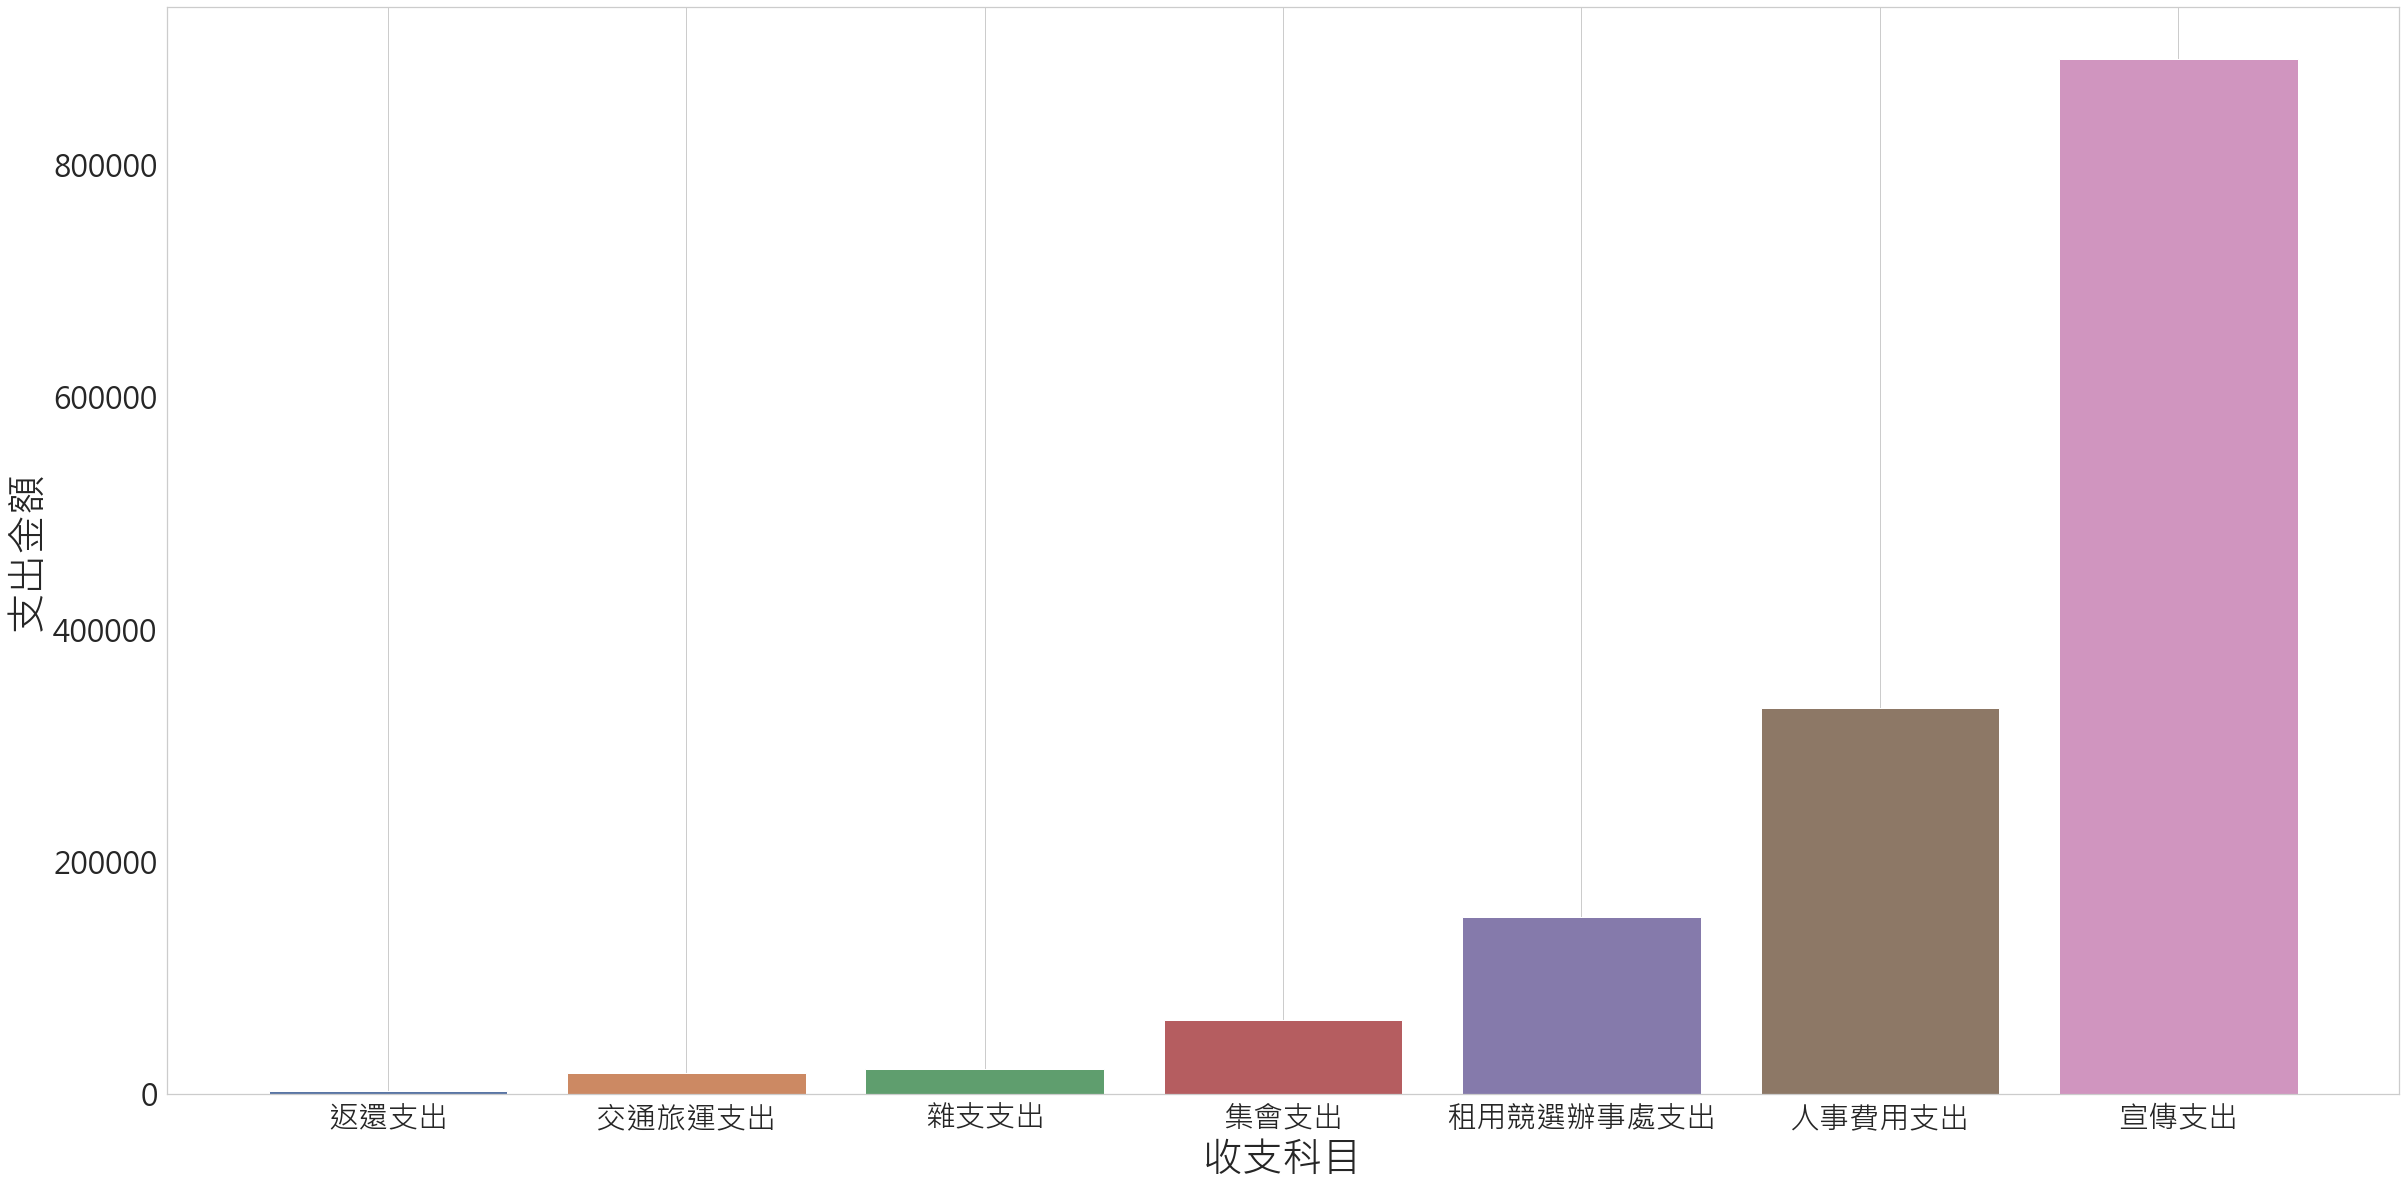

In [11]:
expense = df[df['支出金額']!=0].groupby(by='收支科目').sum().reset_index().sort_values(by='支出金額')
expense = expense[expense['支出金額']>=1000]

plt.figure(figsize=(40, 20))
ax = sns.barplot(x="收支科目", y="支出金額", data=expense[['收支科目','支出金額']], estimator=sum)
label = ax.get_xticklabels()
#plt.setp(label, rotation=45, ha="right",rotation_mode="anchor")
plt.ylabel('支出金額',fontsize=40)
plt.xlabel('收支科目',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
_ = plt.plot()

## 比較其他同區當選人

In [12]:
o_df = pd.read_csv("松山區當選人.csv",encoding='utf-8')

In [13]:
o_df.head()

,項目名稱,選舉名稱,申報序號／年度,交易日期,收支科目,捐贈者／支出對象,身分證／統一編號,收入金額,支出金額,支出用途,金錢類,地址,聯絡電話,資料更正日期
0,張茂楠,107年臺北市議員選舉,首次,107 年 04 月 30 日,雜支支出,台北農產運銷股份有限公司,4550147,0,2025,洋蔥、大蒜頭,金錢,臺北市中山區****,NaN,NaN
1,張茂楠,107年臺北市議員選舉,首次,107 年 04 月 30 日,雜支支出,台北農產運銷股份有限公司,4550147,0,1800,大蒜頭,金錢,臺北市中山區****,NaN,NaN
2,張茂楠,107年臺北市議員選舉,首次,107 年 05 月 01 日,交通旅運支出,台灣中油忠孝東路站,1113283,0,1579,油資,金錢,臺北市信義區****,0227*****,NaN
3,張茂楠,107年臺北市議員選舉,首次,107 年 05 月 04 日,宣傳支出,中華郵政股份有限公司,3741302,0,6300,郵寄競選物品-郵資,金錢,臺北市大安區****,0223*****,NaN
4,張茂楠,107年臺北市議員選舉,首次,107 年 05 月 07 日,宣傳支出,中華郵政股份有限公司,3741302,0,5700,郵寄競選物品-郵資,金錢,臺北市大安區****,0223*****,NaN


In [14]:
o_df['項目名稱'].unique()

array(['張茂楠', '許家蓓', '王鴻薇', '戴錫欽', '陳永德', '徐巧芯', '許淑華', '秦慧珠', '洪健益'],
      dtype=object)

In [15]:
jang = o_df[o_df['項目名稱'] == '張茂楠']
shiu = o_df[o_df['項目名稱'] ==  '許家蓓']
wang = o_df[o_df['項目名稱'] == '王鴻薇']
dai = o_df[o_df['項目名稱'] == '戴錫欽']
chen = o_df[o_df['項目名稱'] == '陳永德']
shiu2 = o_df[o_df['項目名稱'] == '徐巧芯']
shiu3 = o_df[o_df['項目名稱'] == '許淑華']
chin = o_df[o_df['項目名稱'] == '秦慧珠']
hung =o_df[o_df['項目名稱'] == '洪健益']

In [16]:
o_df = pd.concat([o_df,df],axis=0,sort=False)

### 從收入來看

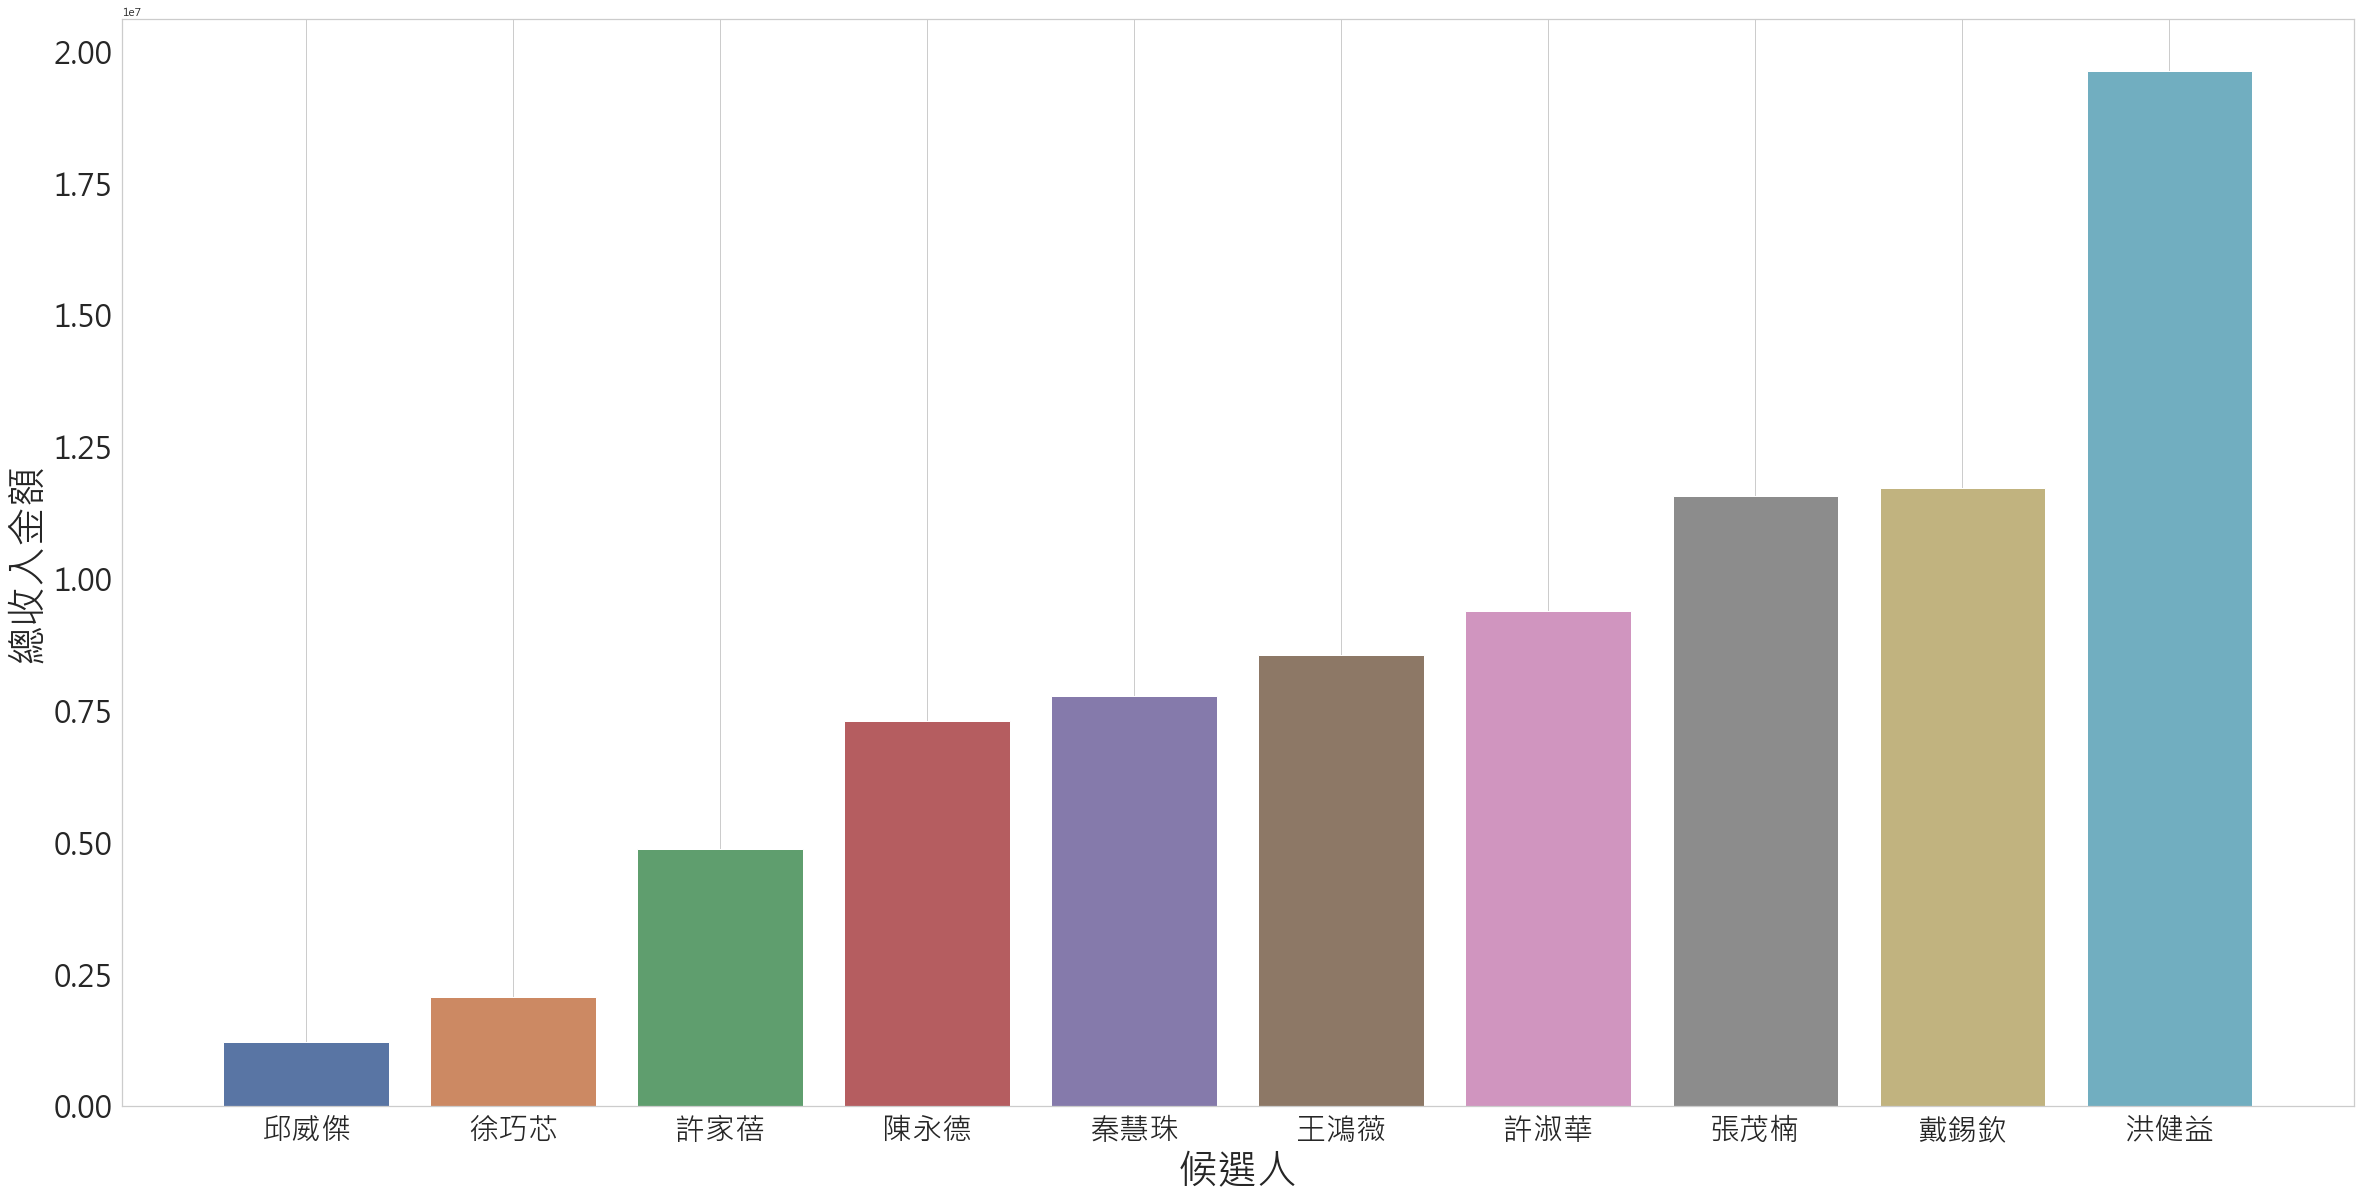

In [76]:
all_income = o_df[o_df['收入金額']!=0].groupby(by='項目名稱').sum().reset_index().sort_values(by='收入金額')
plt.figure(figsize=(40, 20))
ax = sns.barplot(x="項目名稱", y="收入金額", data=all_income[['收入金額','項目名稱']], estimator=sum)
label = ax.get_xticklabels()
#plt.setp(label, rotation=45, ha="right",rotation_mode="anchor")
plt.ylabel('總收入金額',fontsize=40)
plt.xlabel('候選人',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
_ = plt.plot()

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2880x1440 with 0 Axes>

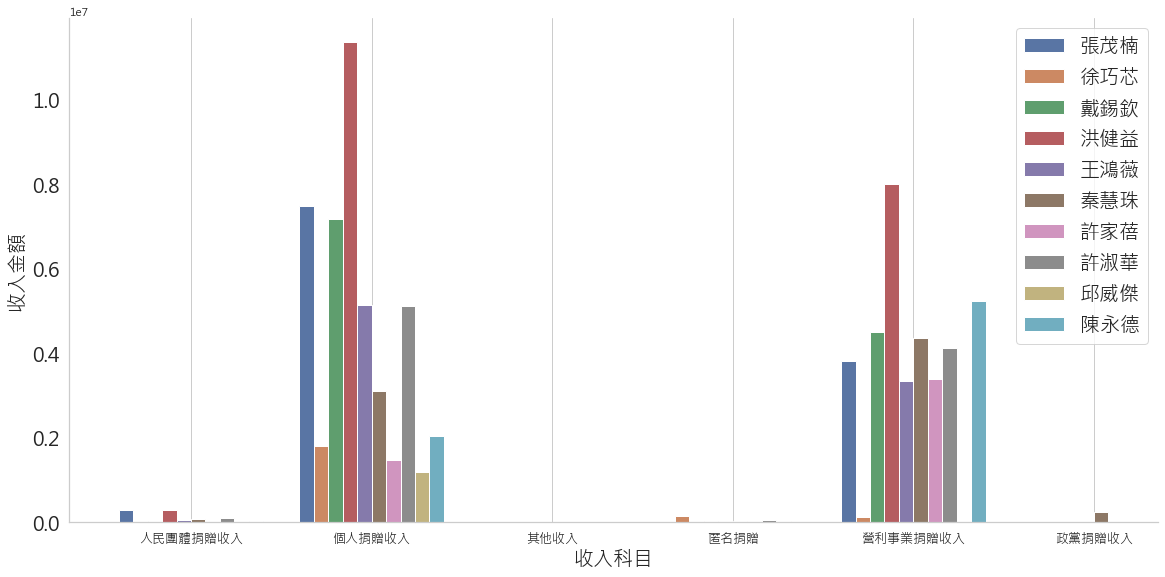

In [18]:
i_cate = o_df.groupby(['項目名稱', '收支科目']).sum().reset_index()
plt.figure(figsize=(40, 20))
sns.factorplot(x='收支科目', y='收入金額', hue='項目名稱', data=i_cate[i_cate['收入金額'] != 0], kind='bar',size=8, aspect=2,legend=False)
plt.ylabel('收入金額',fontsize=20)
plt.xlabel('收入科目',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc='upper right')
plt.grid()
_ = plt.plot()

In [67]:
dict_ = {'陳永德':11848,
         '洪健益':16014,
         '許淑華':16900,
         '秦慧珠':19568,
         '徐巧芯':22929,
         '邱威傑':11786,
         '戴錫欽':15102,
         '王鴻薇':25508,
         '許家蓓':14132,
         '張茂楠':15658}

In [77]:
all_income['票數'] = all_income['項目名稱'].map(dict_)

In [80]:
all_income['票價'] = all_income['收入金額']/all_income['票數']

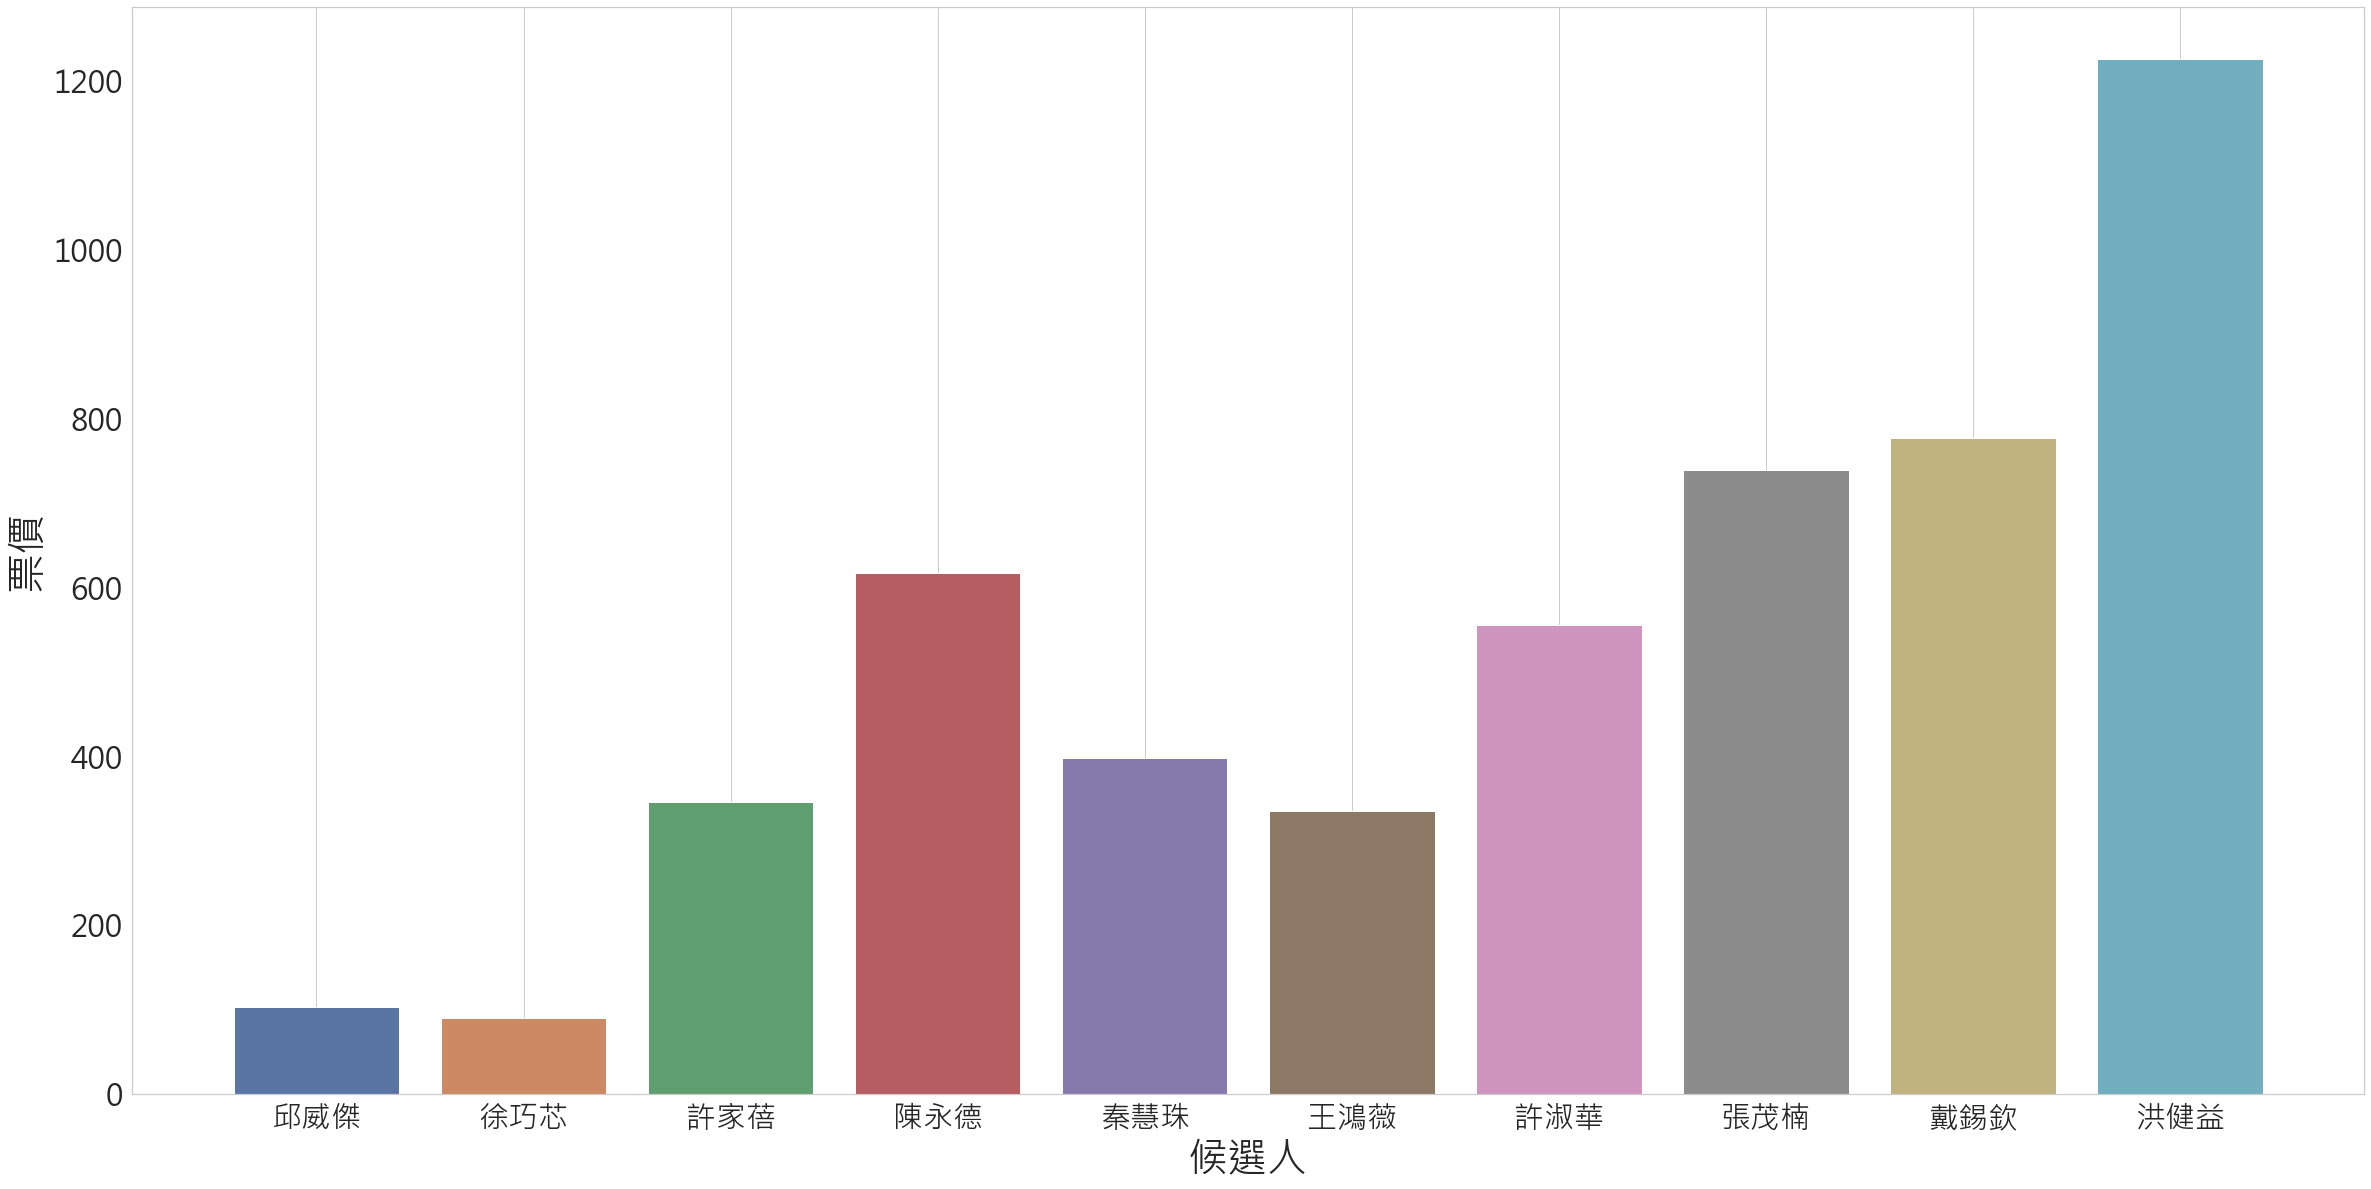

In [82]:
plt.figure(figsize=(40, 20))
ax = sns.barplot(x="項目名稱", y="票價", data=all_income[['票價','項目名稱']], estimator=sum)
label = ax.get_xticklabels()
#plt.setp(label, rotation=45, ha="right",rotation_mode="anchor")
plt.ylabel('票價',fontsize=40)
plt.xlabel('候選人',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
_ = plt.plot()

### 從支出來看

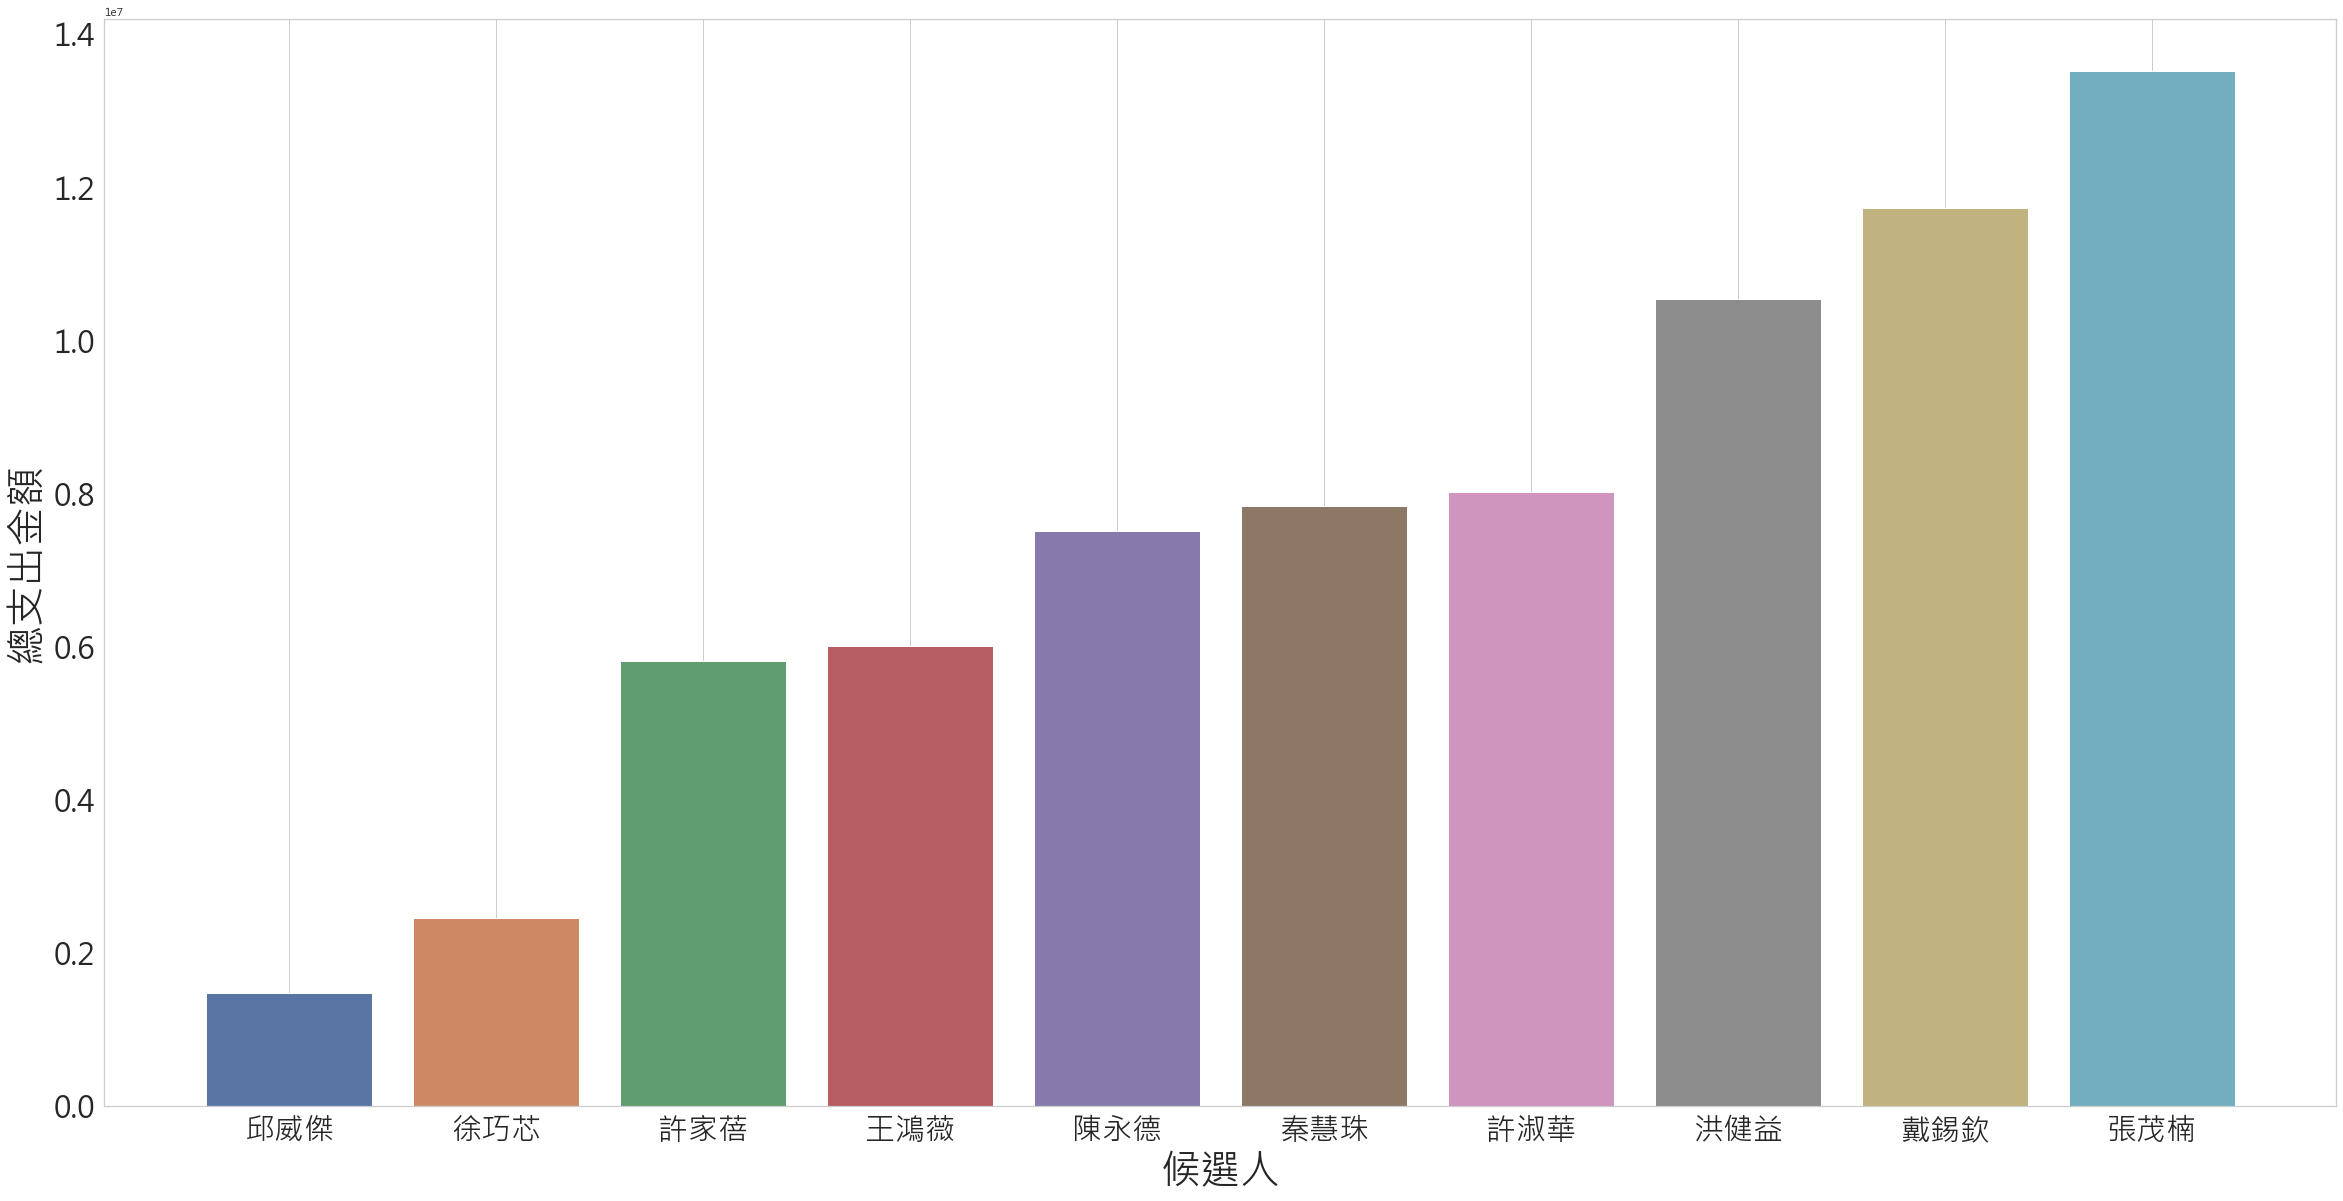

In [19]:
all_expense = o_df[o_df['支出金額']!=0].groupby(by='項目名稱').sum().reset_index().sort_values(by='支出金額')
plt.figure(figsize=(40, 20))
ax = sns.barplot(x="項目名稱", y="支出金額", data=all_expense[['支出金額','項目名稱']], estimator=sum)
label = ax.get_xticklabels()
#plt.setp(label, rotation=45, ha="right",rotation_mode="anchor")
plt.ylabel('總支出金額',fontsize=40)
plt.xlabel('候選人',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
_ = plt.plot()

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2880x1440 with 0 Axes>

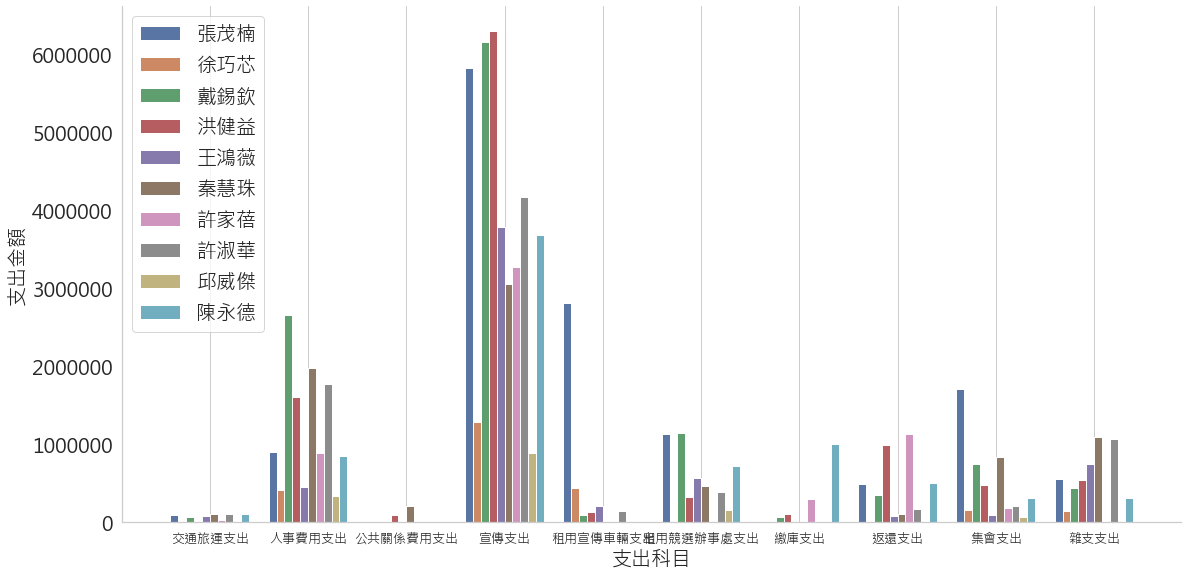

In [20]:
ie_cate = o_df.groupby(['項目名稱', '收支科目']).sum().reset_index()
plt.figure(figsize=(40, 20))
sns.factorplot(x='收支科目', y='支出金額', hue='項目名稱', data=ie_cate[ie_cate['支出金額'] != 0], kind='bar',size=8, aspect=2,legend=False)
plt.ylabel('支出金額',fontsize=20)
plt.xlabel('支出科目',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc='upper left')
plt.grid()
_ = plt.plot()

### 餘額

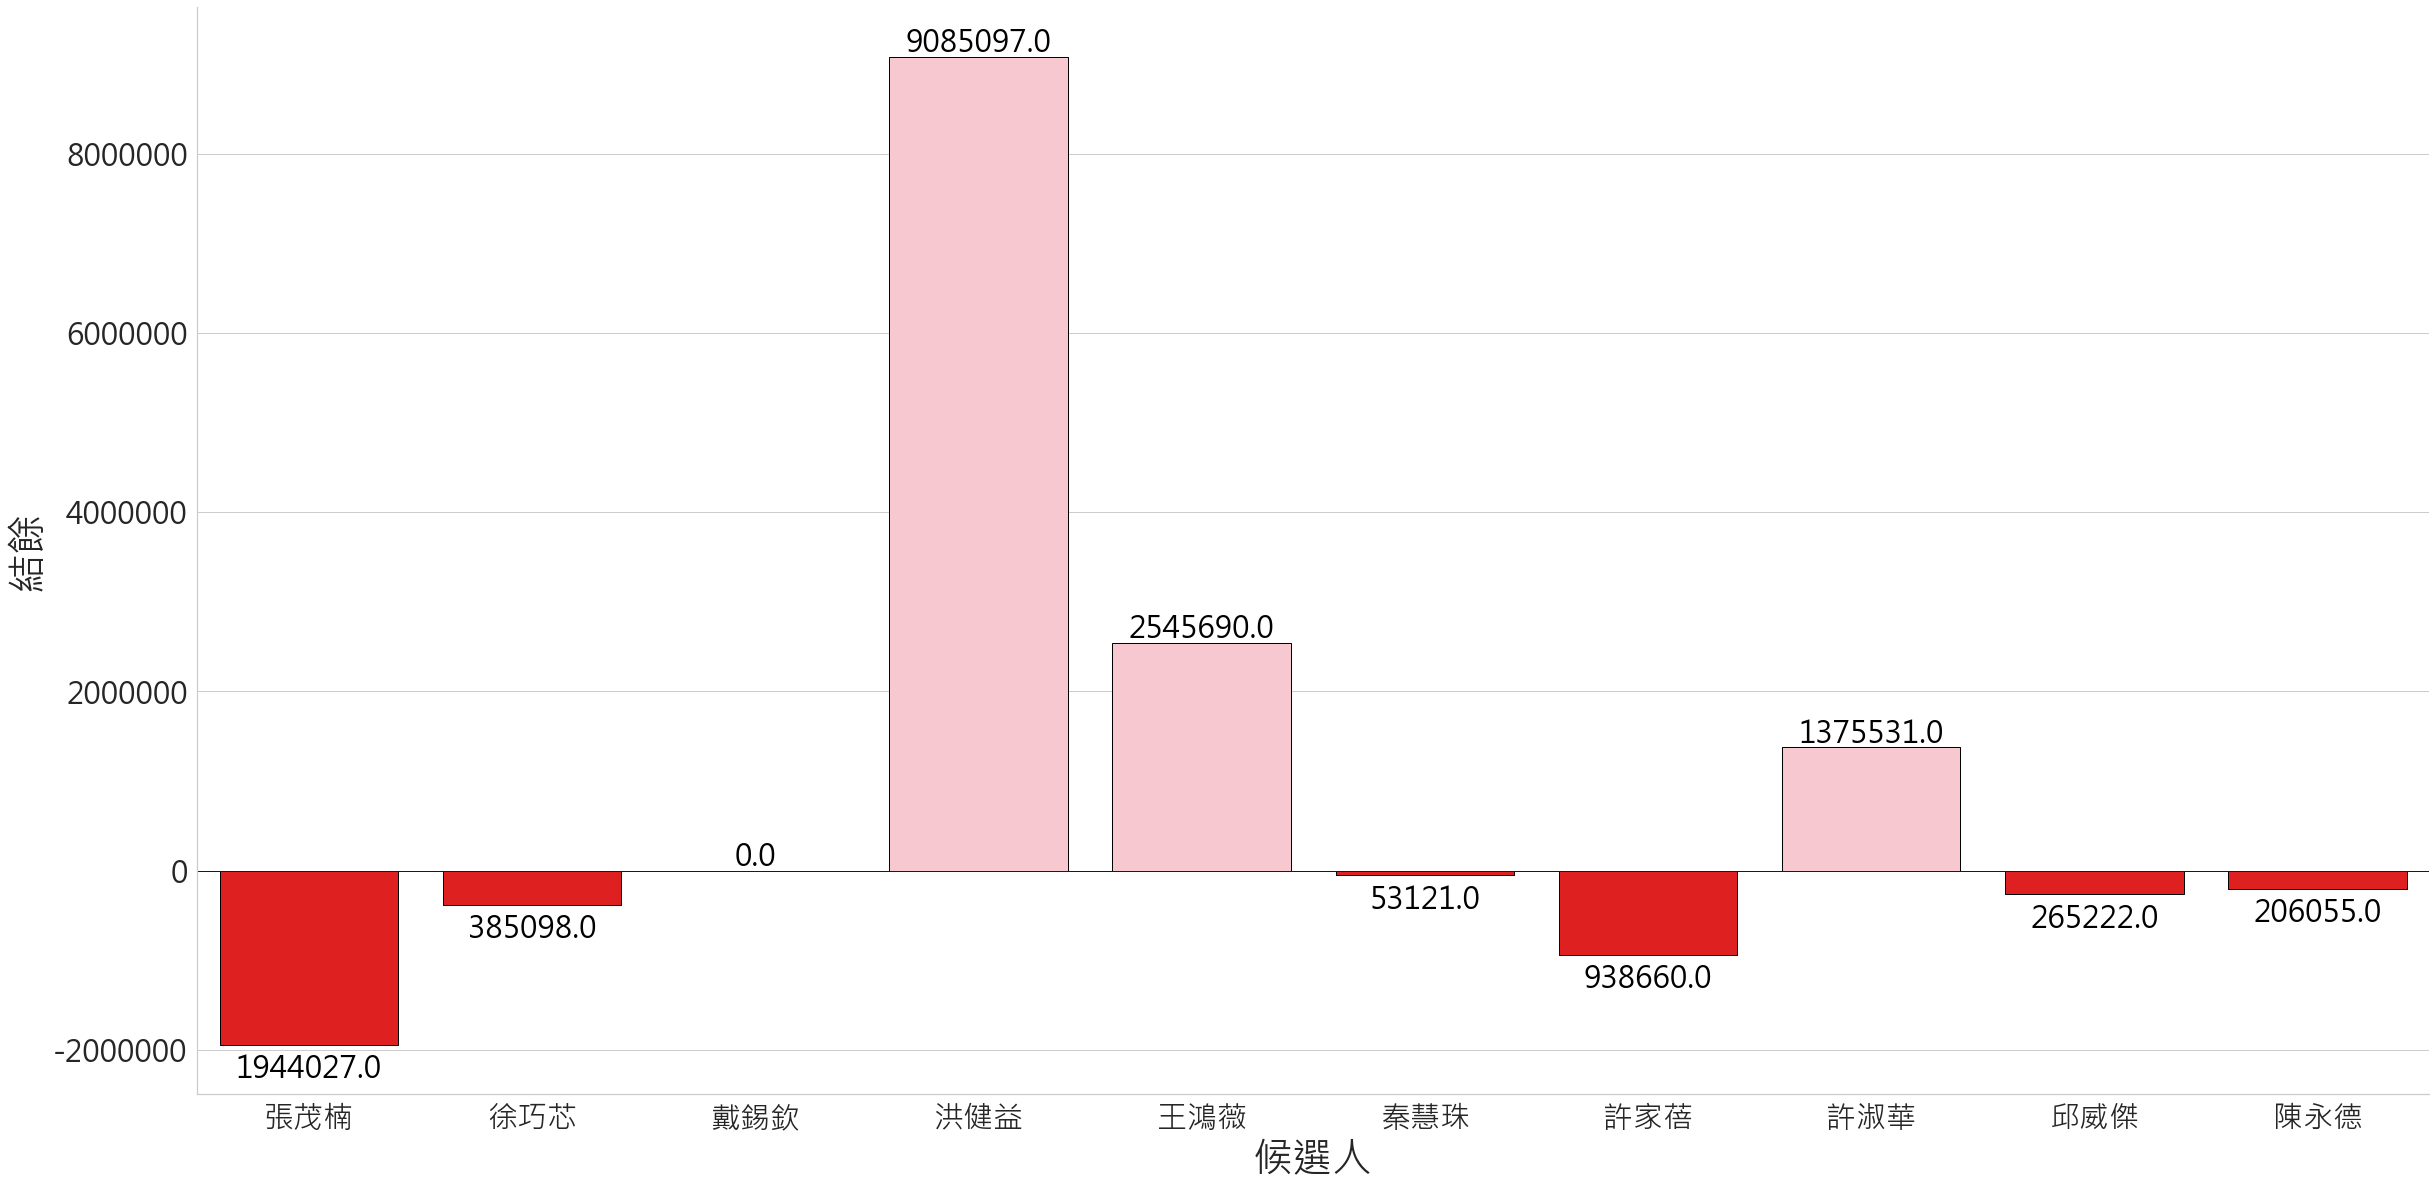

In [21]:
x = list(all_income.sort_values(by='項目名稱')['項目名稱'])
y = list(all_income.sort_values(by='項目名稱')['收入金額'] - all_expense.sort_values(by='項目名稱')['支出金額'])

plt.figure(figsize=(40, 20))
plt.ylabel('結餘',fontsize=40)
plt.xlabel('候選人',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

colors = ['pink' if _y >=0 else 'red' for _y in y]
ax = sns.barplot(x, y,palette=colors, edgecolor='black')

for n, (label, _y) in enumerate(zip(x, y)):
    if _y < 0:
        place = (0,-25)
    else:
        place = (0,13)
        
    ax.annotate(
        s='{:.1f}'.format(abs(_y)),
        xy=(n, _y),
        ha='center',va='center',
        xytext=place,
        textcoords='offset pixels',
        color='black',
        weight='bold',
        fontsize =30
    )


plt.axhline(0, color='k', lw=1)
sns.despine(ax=ax)

### 來看看張茂楠怎麼花那麼多錢

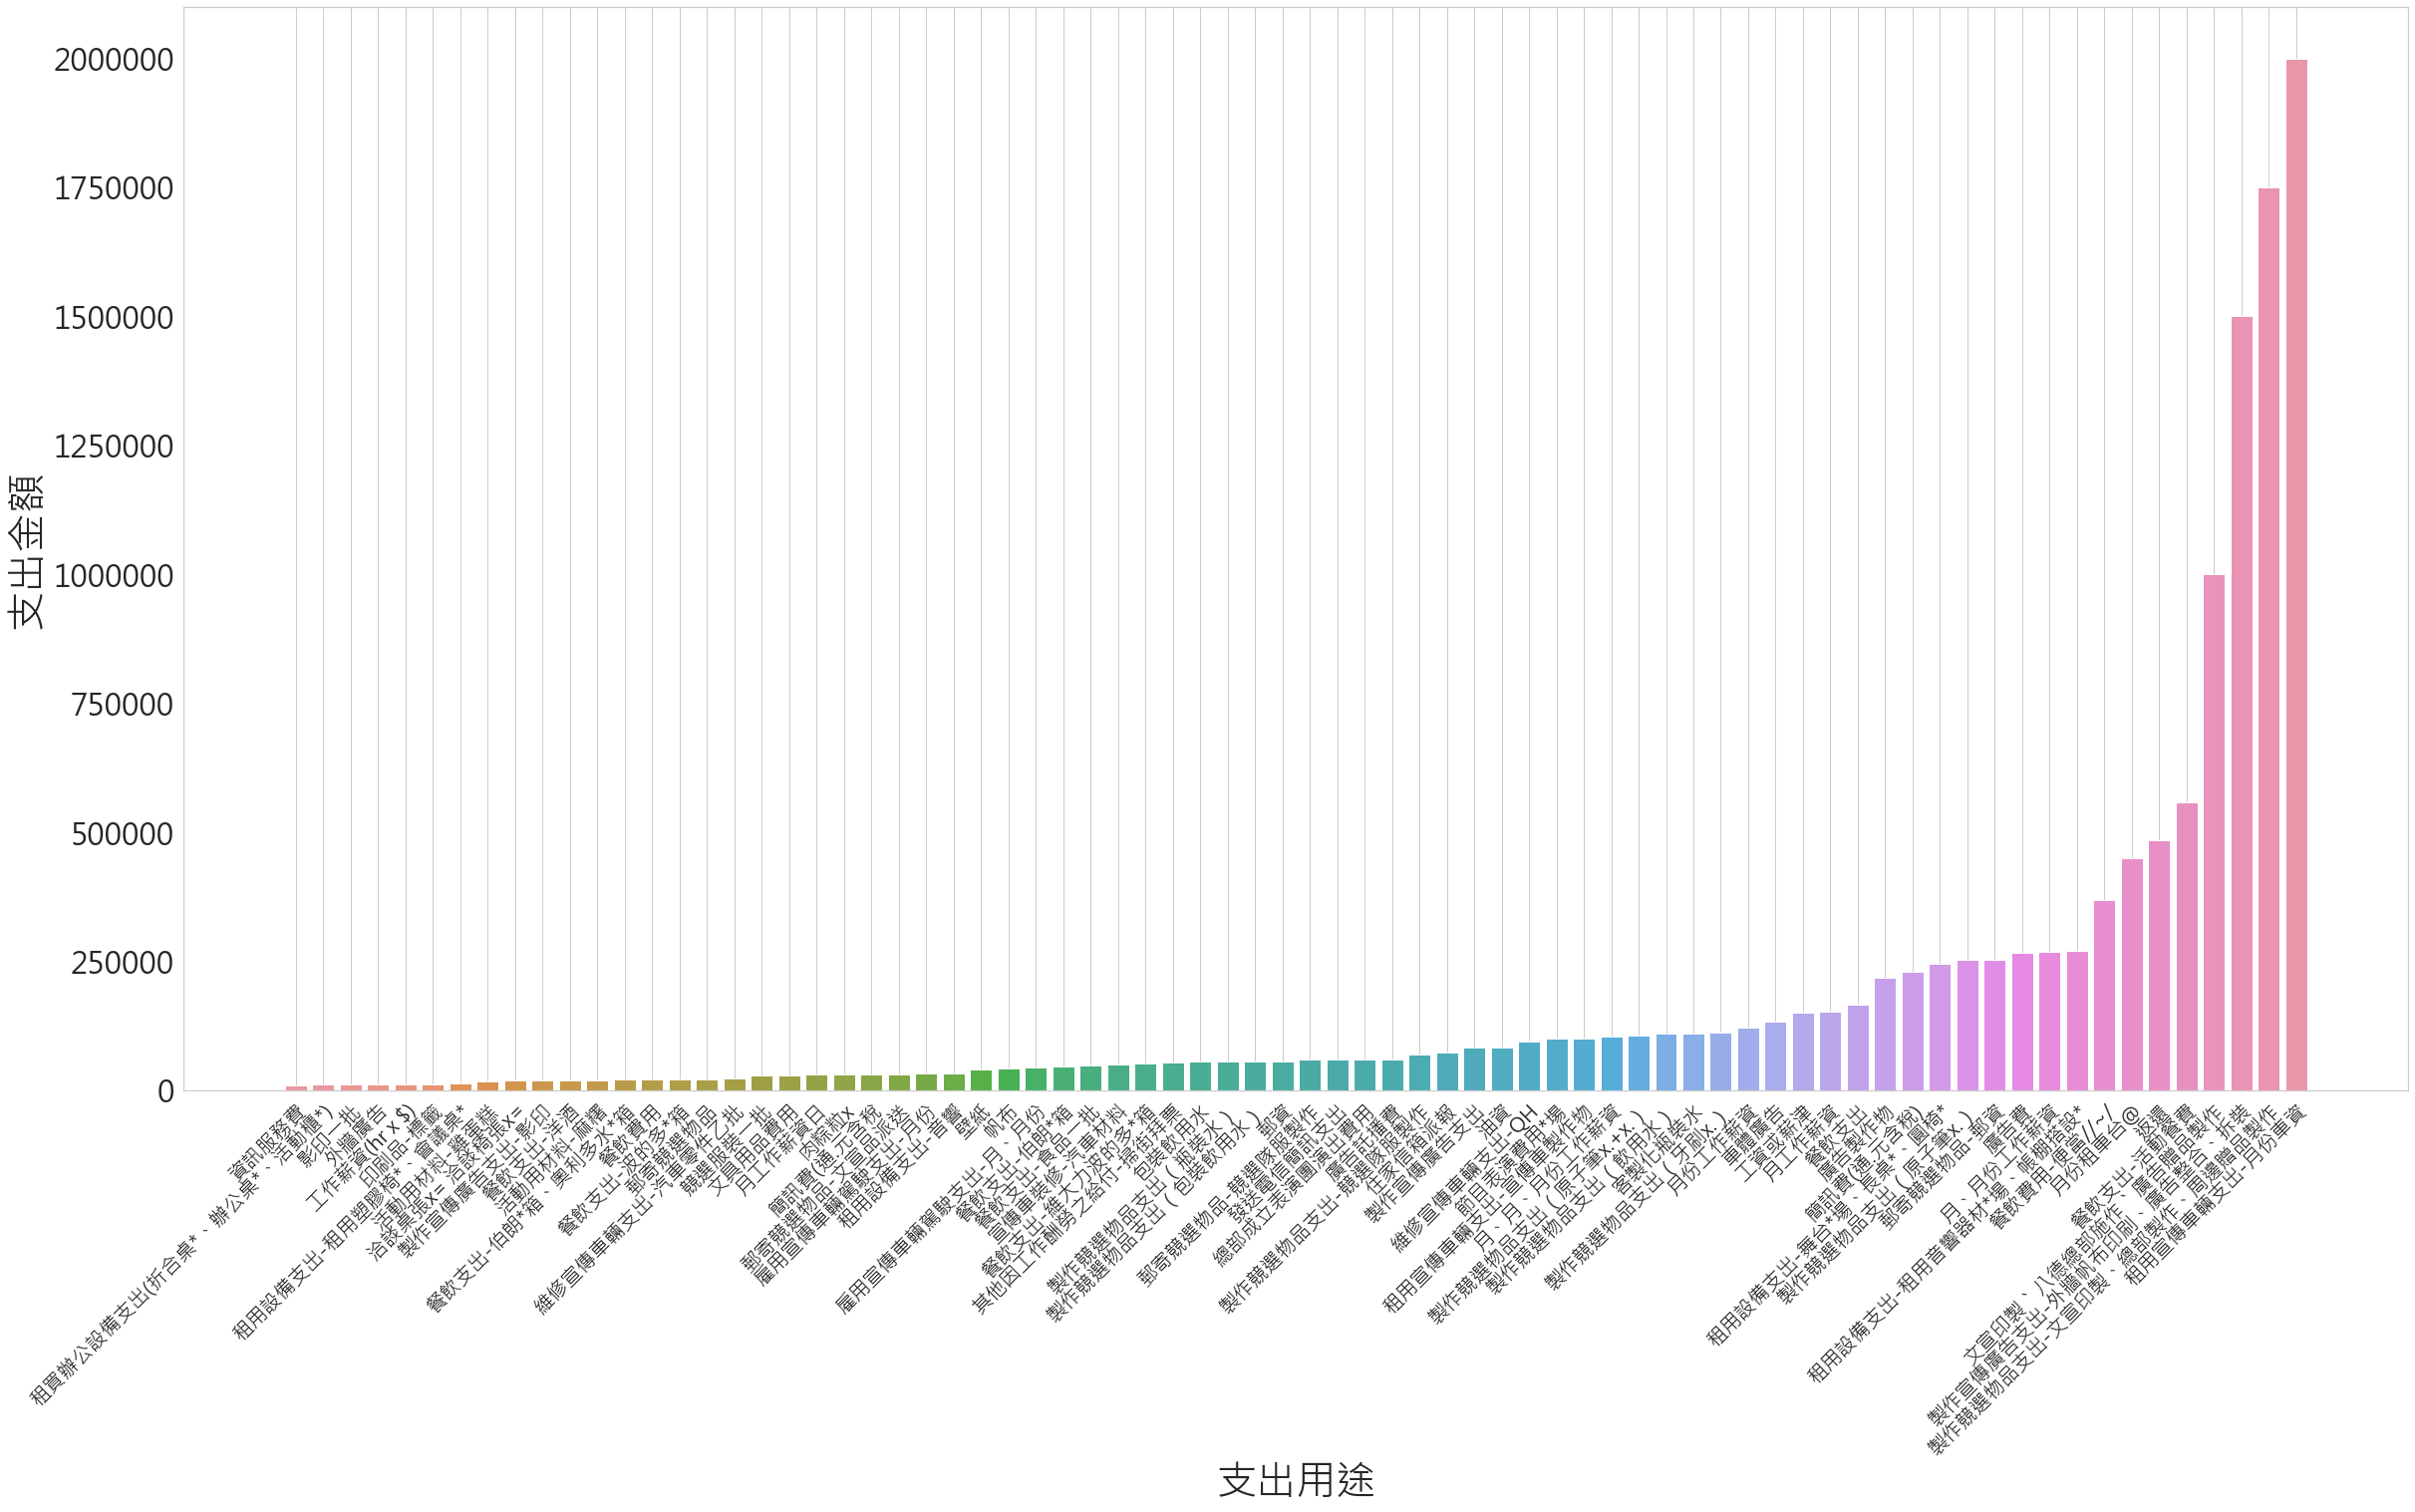

In [22]:
c_df = jang
expense = c_df[c_df['支出金額']!=0].groupby(by='支出用途').sum().reset_index().sort_values(by='支出金額')
expense = expense[expense['支出金額']>=10000]

plt.figure(figsize=(40, 20))
ax = sns.barplot(x="支出用途", y="支出金額", data=expense[['支出用途','支出金額']], estimator=sum)
label = ax.get_xticklabels()
plt.setp(label, rotation=45, ha="right",rotation_mode="anchor")
plt.ylabel('支出金額',fontsize=40)
plt.xlabel('支出用途',fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=30)
plt.grid()
_ = plt.plot()

In [23]:
expense[expense['支出用途'].str.contains("餐飲支出")]

,支出用途,收入金額,支出金額,資料更正日期
136,餐飲支出-洋酒,0,20000,0.0
134,餐飲支出-伯朗*箱、奧利多水*箱,0,21400,0.0
135,餐飲支出-波的多*箱,0,21460,0.0
133,餐飲支出-伯朗*箱,0,45600,0.0
140,餐飲支出-食品一批,0,48545,0.0
139,餐飲支出-維大力波的多*箱,0,51100,0.0
132,餐飲支出,0,166678,0.0
138,餐飲支出-活動餐費,0,559016,0.0


In [24]:
expense[expense['支出用途'].str.contains("活動用材料")]

,支出用途,收入金額,支出金額,資料更正日期
52,活動用材料-雞蛋糕,0,18000,0.0
53,活動用材料-麻糬,0,20000,0.0


In [25]:
expense[expense['支出用途'].str.contains("牙刷")]

,支出用途,收入金額,支出金額,資料更正日期
95,製作競選物品支出（牙刷x.）,0,111250,0.0


## 接下來從同樣無黨籍候選人來看

In [26]:
n_df = pd.read_csv('無黨籍當選人.csv')

In [27]:
n_df.head()

,項目名稱,選舉名稱,申報序號∕年度,交易日期,收支科目,捐贈者∕支出對象,身分證∕統一編號,收入金額,支出金額,支出用途,金錢類,地址,聯絡電話,資料更正日期
0,陳建銘,107年臺北市議員選舉,首次,107 年 04 月 25 日,人事費用支出,梁莉萍,F22*******,0,40000,工資或薪津,金錢,臺北市士林區****,NaN,NaN
1,陳建銘,107年臺北市議員選舉,首次,107 年 04 月 25 日,人事費用支出,黃三連,R10*******,0,50000,工資或薪津,金錢,台北市士林區****,NaN,NaN
2,陳建銘,107年臺北市議員選舉,首次,107 年 04 月 25 日,人事費用支出,梁筱萍,F22*******,0,40000,工資或薪津,金錢,臺北市士林區****,NaN,NaN
3,陳建銘,107年臺北市議員選舉,首次,107 年 04 月 30 日,人事費用支出,黃鼎明,F12*******,0,10000,工資或薪津,金錢,新北市淡水區****,NaN,NaN
4,陳建銘,107年臺北市議員選舉,首次,107 年 04 月 30 日,人事費用支出,徐可俐,T22*******,0,45000,工資或薪津,金錢,臺北市士林區****,NaN,NaN


In [28]:
n_df = pd.concat([n_df,df],axis=0,sort=False)

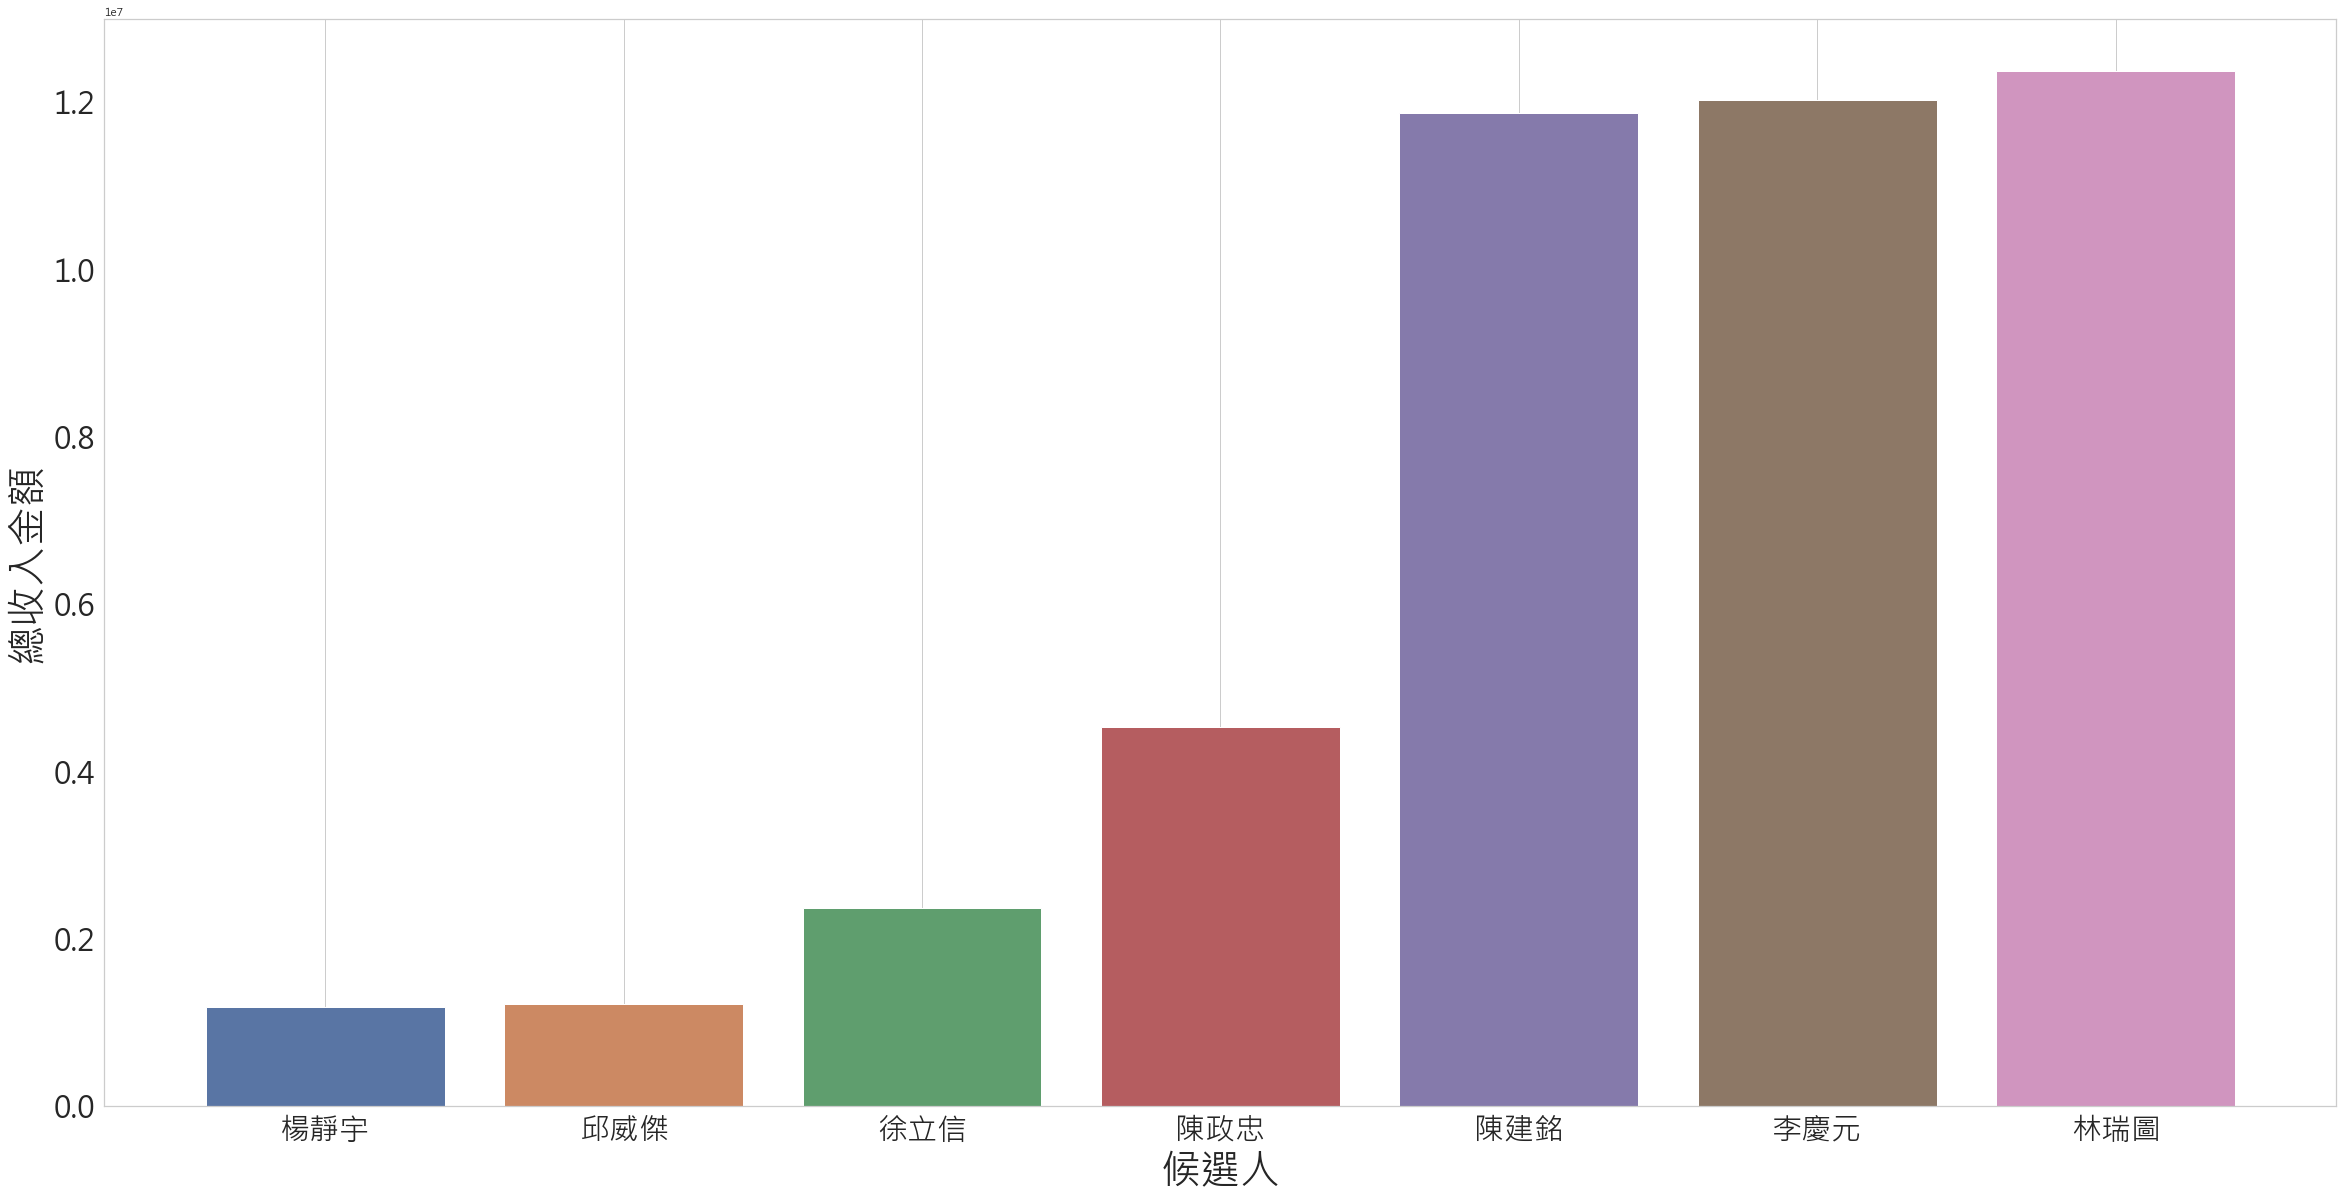

In [29]:
all_income = n_df[n_df['收入金額']!=0].groupby(by='項目名稱').sum().reset_index().sort_values(by='收入金額')
plt.figure(figsize=(40, 20))
ax = sns.barplot(x="項目名稱", y="收入金額", data=all_income[['收入金額','項目名稱']], estimator=sum)
label = ax.get_xticklabels()
#plt.setp(label, rotation=45, ha="right",rotation_mode="anchor")
plt.ylabel('總收入金額',fontsize=40)
plt.xlabel('候選人',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
_ = plt.plot()

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2880x1440 with 0 Axes>

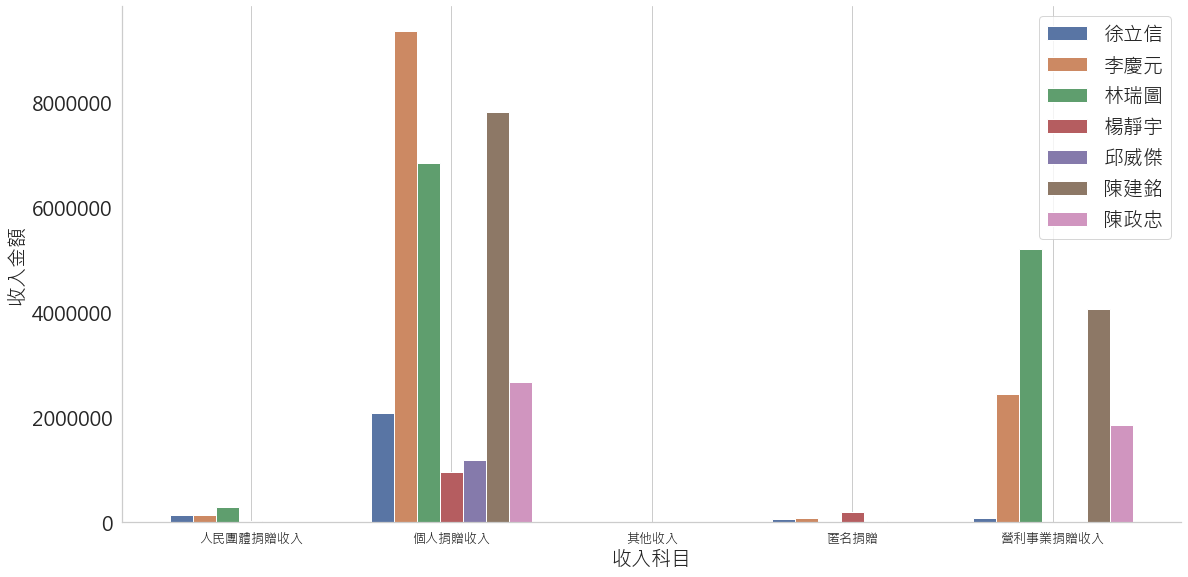

In [30]:
i_cate = n_df.groupby(['項目名稱', '收支科目']).sum().reset_index()
plt.figure(figsize=(40, 20))
sns.factorplot(x='收支科目', y='收入金額', hue='項目名稱', data=i_cate[i_cate['收入金額'] != 0], kind='bar',size=8, aspect=2,legend=False)
plt.ylabel('收入金額',fontsize=20)
plt.xlabel('收入科目',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc='upper right')
plt.grid()
_ = plt.plot()

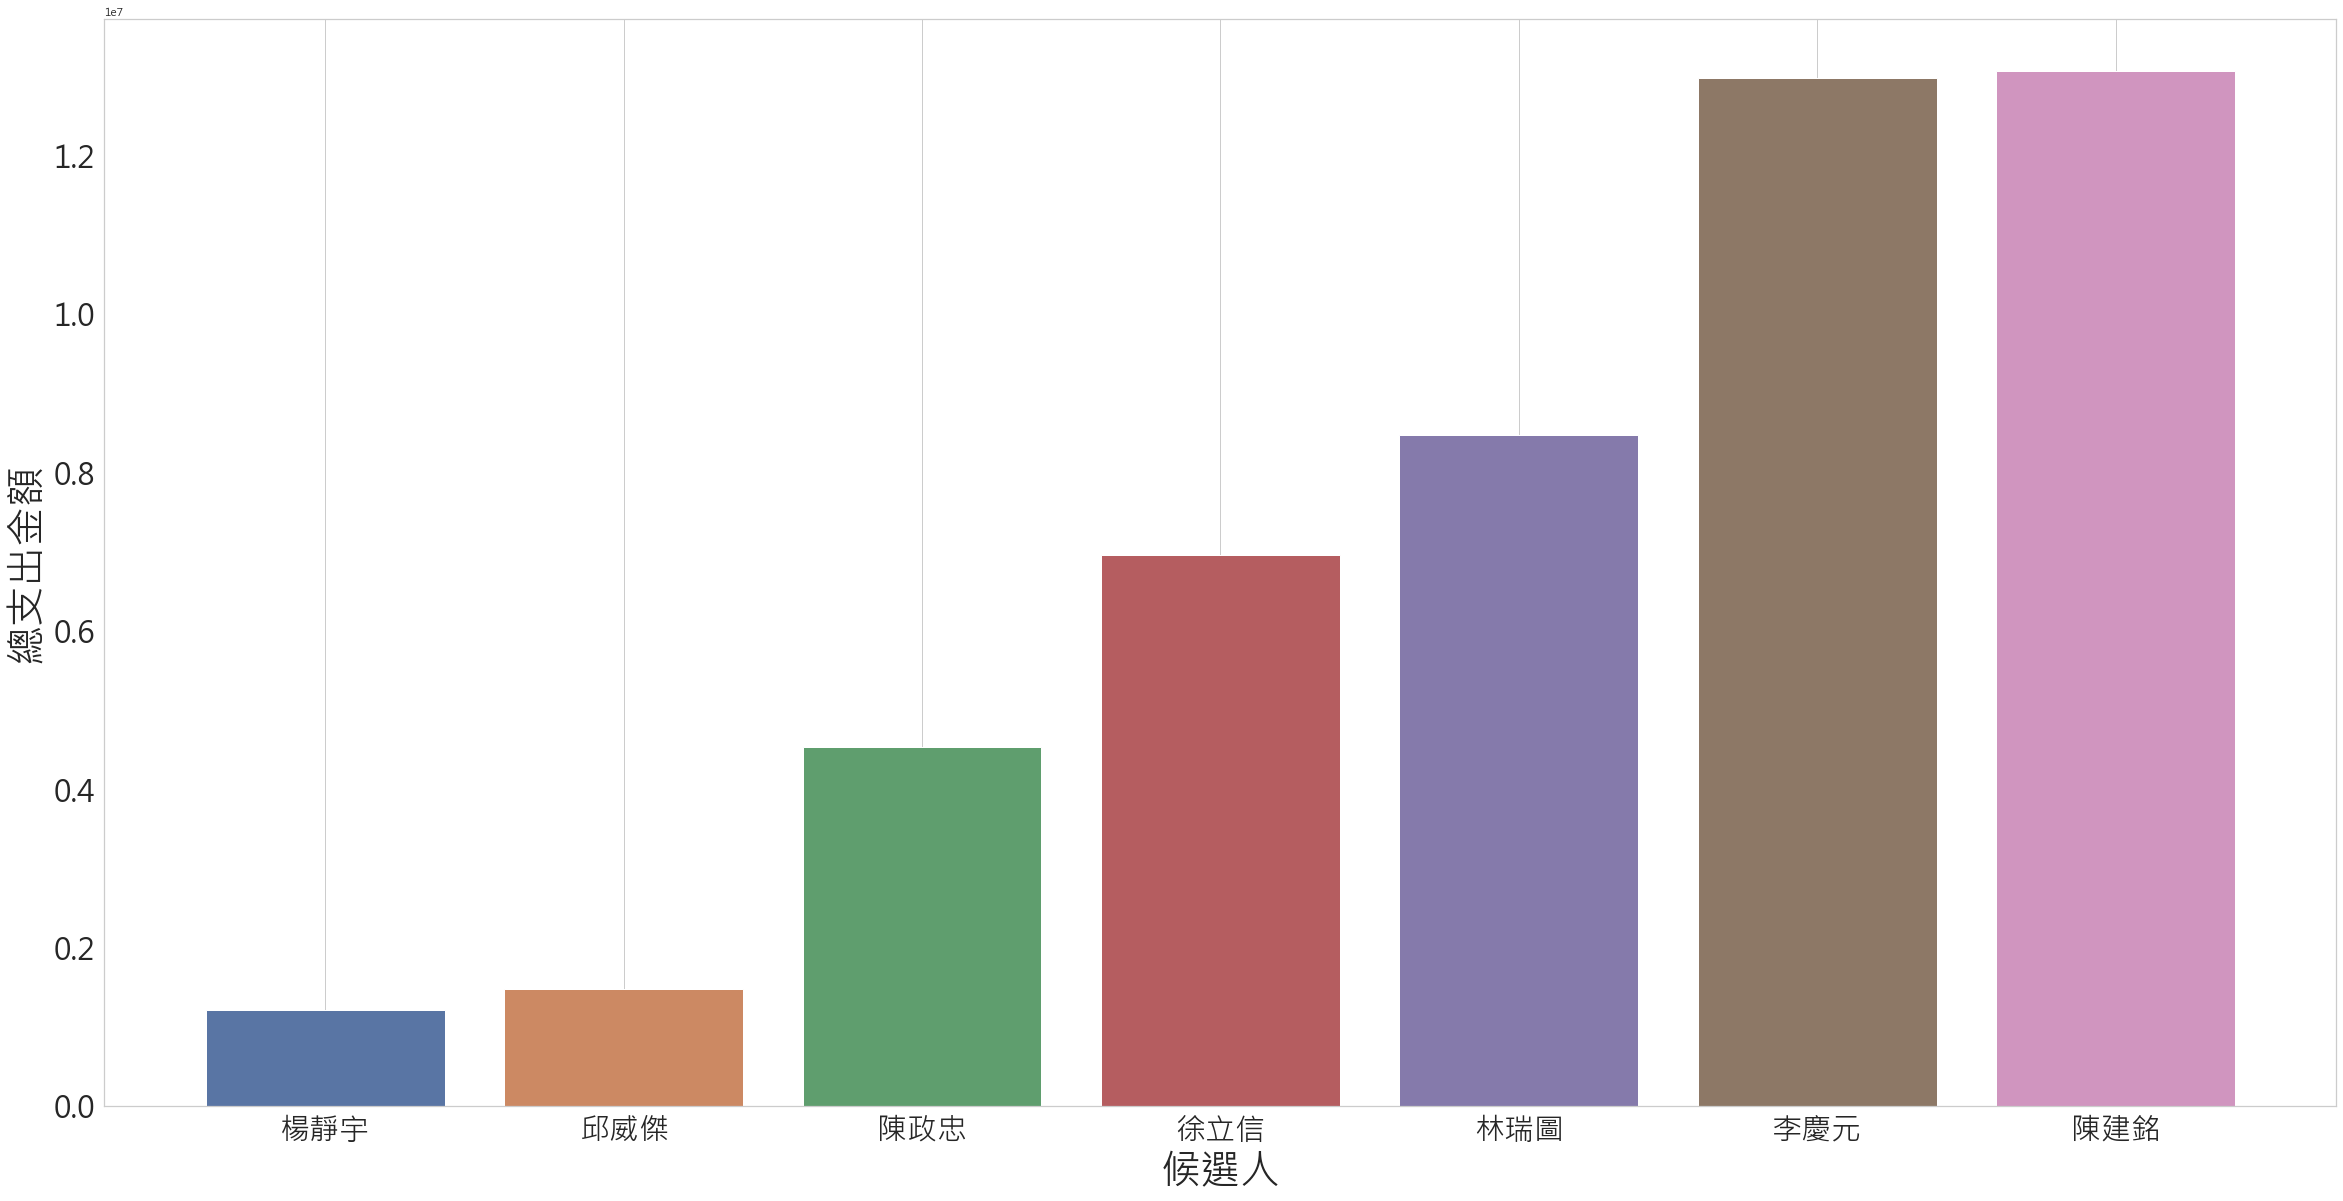

In [31]:
all_expense = n_df[n_df['支出金額']!=0].groupby(by='項目名稱').sum().reset_index().sort_values(by='支出金額')
plt.figure(figsize=(40, 20))
ax = sns.barplot(x="項目名稱", y="支出金額", data=all_expense[['支出金額','項目名稱']], estimator=sum)
label = ax.get_xticklabels()
#plt.setp(label, rotation=45, ha="right",rotation_mode="anchor")
plt.ylabel('總支出金額',fontsize=40)
plt.xlabel('候選人',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
_ = plt.plot()

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2880x1440 with 0 Axes>

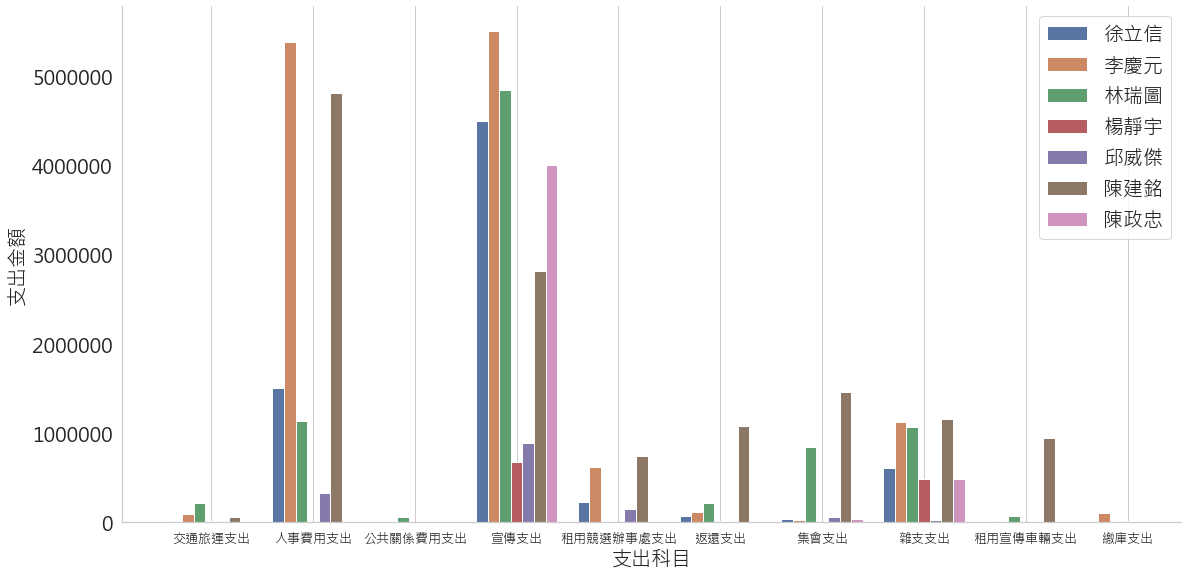

In [32]:
ie_cate = n_df.groupby(['項目名稱', '收支科目']).sum().reset_index()
plt.figure(figsize=(40, 20))
sns.factorplot(x='收支科目', y='支出金額', hue='項目名稱', data=ie_cate[ie_cate['支出金額'] != 0], kind='bar',size=8, aspect=2,legend=False)
plt.ylabel('支出金額',fontsize=20)
plt.xlabel('支出科目',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc='upper right')
plt.grid()
_ = plt.plot()

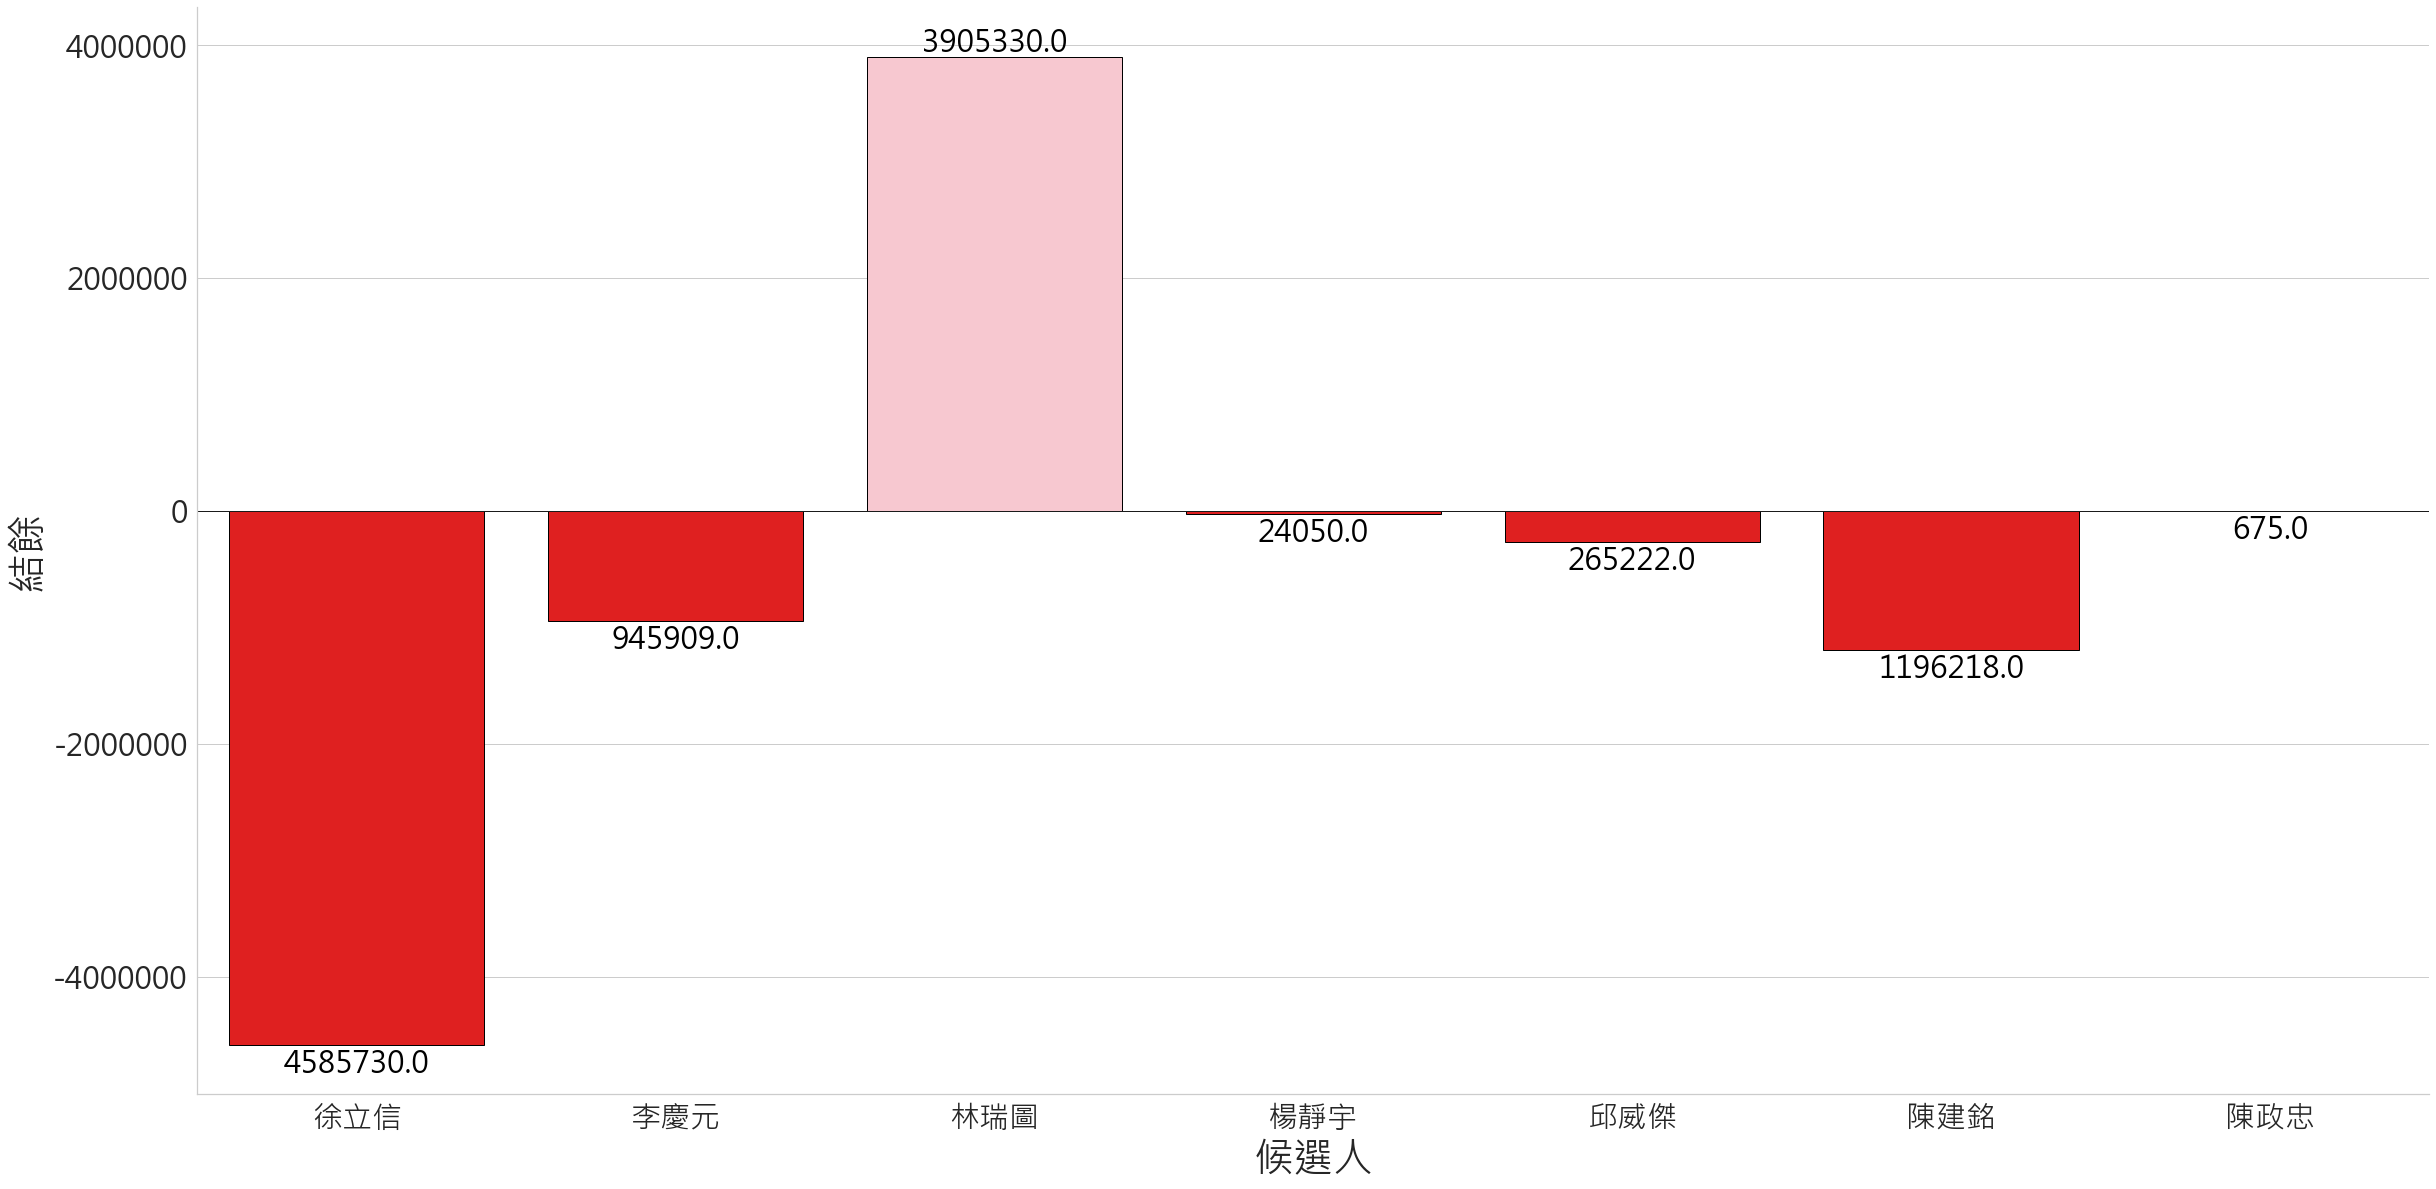

In [33]:
x = list(all_income.sort_values(by='項目名稱')['項目名稱'])
y = list(all_income.sort_values(by='項目名稱')['收入金額'] - all_expense.sort_values(by='項目名稱')['支出金額'])

plt.figure(figsize=(40, 20))
plt.ylabel('結餘',fontsize=40)
plt.xlabel('候選人',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

colors = ['pink' if _y >=0 else 'red' for _y in y]
ax = sns.barplot(x, y,palette=colors, edgecolor='black')

for n, (label, _y) in enumerate(zip(x, y)):
    if _y < 0:
        place = (0,-20)
    else:
        place = (0,13)
        
    ax.annotate(
        s='{:.1f}'.format(abs(_y)),
        xy=(n, _y),
        ha='center',va='center',
        xytext=place,
        textcoords='offset pixels',
        color='black',
        weight='bold',
        fontsize =30
    )


plt.axhline(0, color='k', lw=1)
sns.despine(ax=ax)

## 楊靜宇感覺蠻厲害的來看看他

In [34]:
yang = n_df[n_df['項目名稱'] == '楊靜宇']

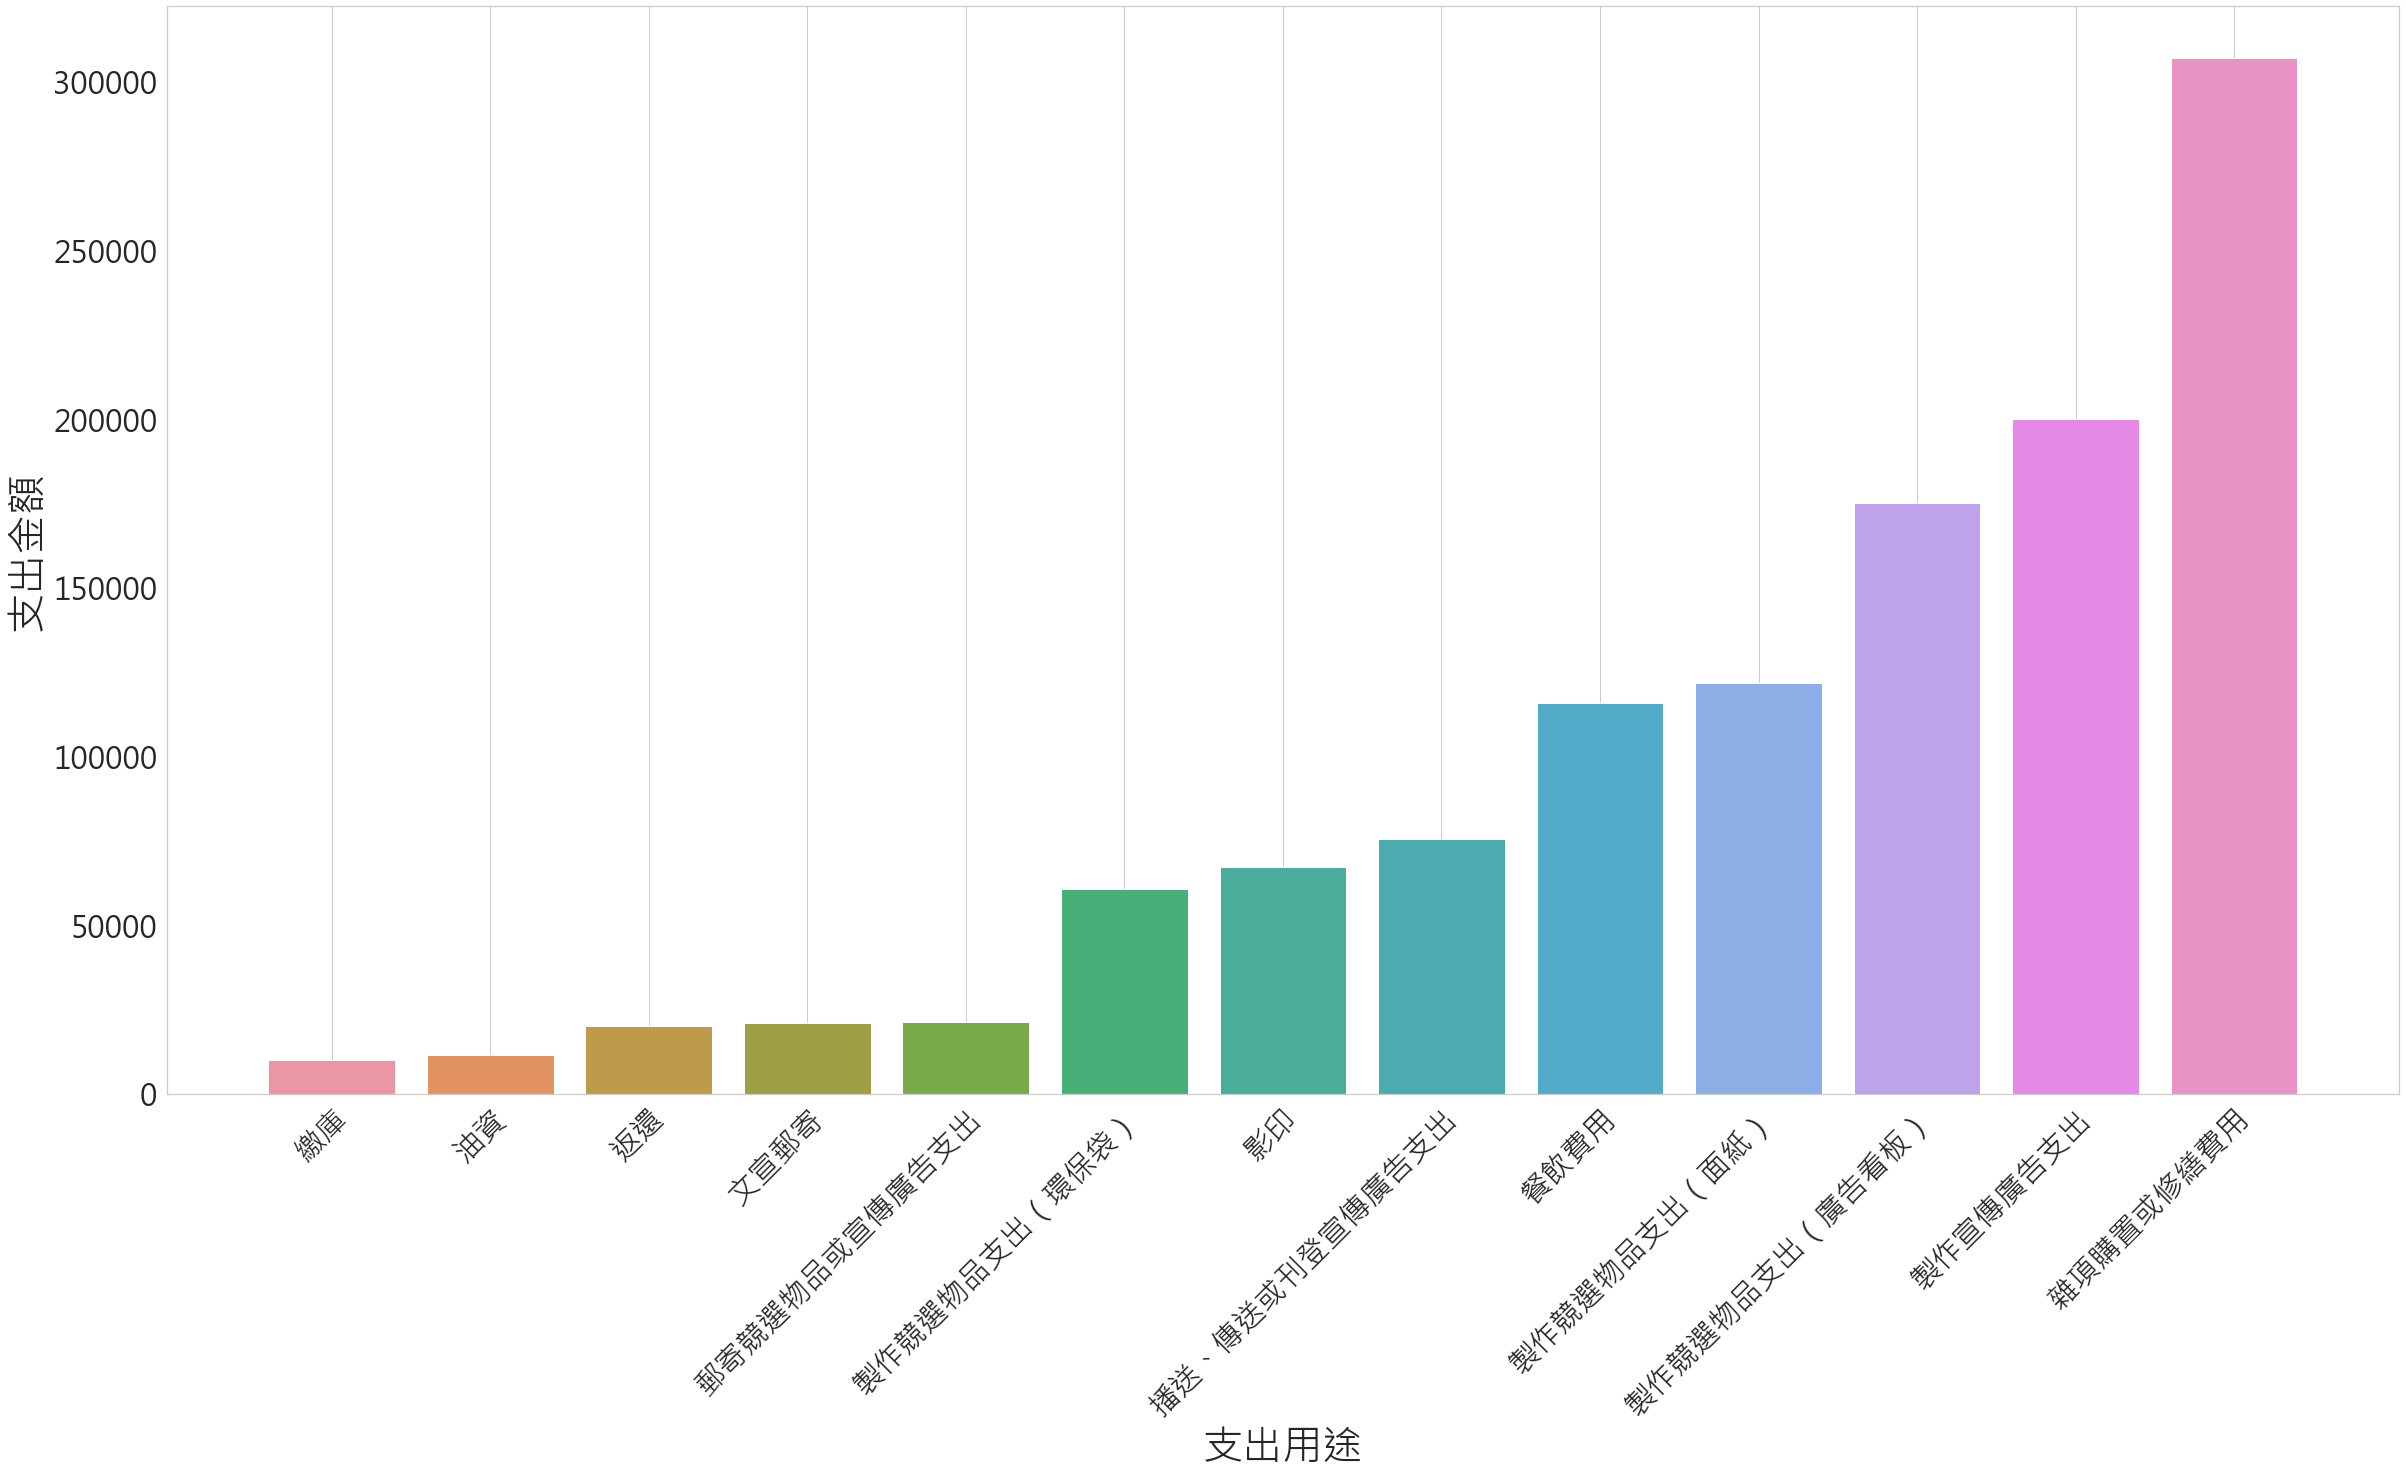

In [35]:
c_df = yang
expense = c_df[c_df['支出金額']!=0].groupby(by='支出用途').sum().reset_index().sort_values(by='支出金額')
expense = expense[expense['支出金額']>=10000]

plt.figure(figsize=(40, 20))
ax = sns.barplot(x="支出用途", y="支出金額", data=expense[['支出用途','支出金額']], estimator=sum)
label = ax.get_xticklabels()
plt.setp(label, rotation=45, ha="right",rotation_mode="anchor")
plt.ylabel('支出金額',fontsize=40)
plt.xlabel('支出用途',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
_ = plt.plot()

「如果我心裡想著要連任的話，就會跟區內的里長以及各種勢力如建商妥協，只為了獲得下屆連任勝選的資源。」